In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv


# Introduction

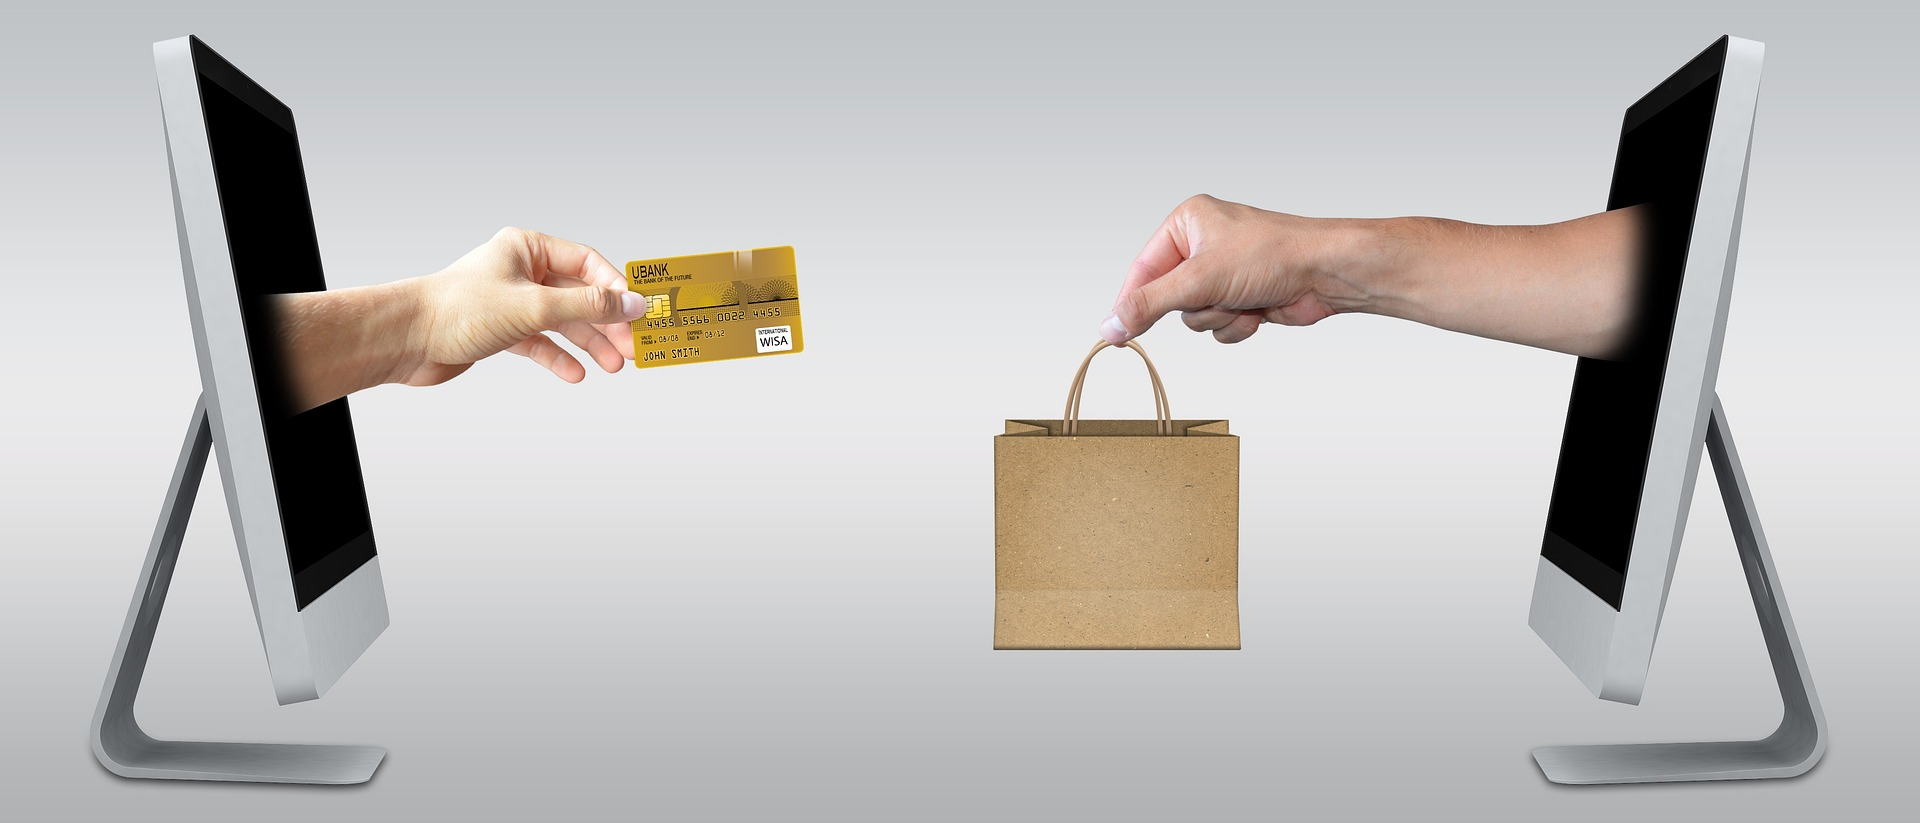

## Background Information
In a world where financial accessibility and consumerism are on the rise, the phrase "Buy now, pay later" has become increasingly enticing. It offers an immediate dopamine rush, allowing us to own products even when we lack the funds to purchase them. However, this impulsive buying behavior often leads to overwhelming debt burdens, pushing individuals into the category of defaulters or, in some cases, even fraudsters.

## Problem Statement
To address this issue, we turn to the realm of machine learning. While we can't alter companies' marketing strategies, we can take proactive steps by assessing a buyer's creditworthiness based on their financial history.

## Objective
The primary objective of this project is to leverage machine learning to predict whether a credit card user is likely to default on their payments. By evaluating past financial behaviors and patterns, we aim to provide credit decisions that are both responsible and sustainabl

# Data Overview

## Data Collection

In [2]:
pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 19.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from feature_engine import transformation as vt
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
from sklearn.calibration import  calibration_curve,CalibrationDisplay
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,classification_report,confusion_matrix,roc_curve
from sklearn.preprocessing import  PowerTransformer, Normalizer

In [5]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [6]:
df = pd.read_csv('/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Understand the data

* This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan **from April 2005 to September 2005**.
* Every transaction value is in New Taiwan(NT) Dollars

### What column name conveys-

* ID - Id of each client
* LIMIT_BAL - Amount of given credit in NT dollars(includes individual and family/supplementary credit)
* SEX - 
* * 1 - male
* * 2 - female
* EDUCATION -
* * 1 - Graduate school
* * 2 - University
* * 3 - High school
* * 4 - others
* * 5 - Unknown
* MARRIAGE - Martial status
* * 1 - Married
* * 2 - single
* * 3 - Others
* AGE - Age in years
* PAY_0 - September repayment status
* * -2 - No consumption
* * -1 - pay duly
* * 0 - Use of revolving credit
* * 1 - payment delay one month
* * 2 - payment delay for two months
* * 3 - payment delay for three months
* * 8 - payment delay for eight months
* * 9 - payment delay for nine months or above
* PAY_2 - August repayment status(same code)
* PAY_3 - July repayment status(same code)
* PAY_4 - June repayment status(same code)
* PAY_5 - May repayment status(same code)
* PAY 6 - April repayment status(same code)
* BILL_AMT1 - September Bill statement
* BILL_AMT2 - August Bill Statement
* BILL_AMT3 - July Bill Statement
* BILL_AMT4 - June Bill Statement
* BILL_AMT5 - May Bill Statement
* BIll_AMT6 - April Bill Statement
* PAY_AMT1 - Amount of previous payment in September
* PAY_AMT2 - Amount of previous payment in August
* PAY_AMT3 - ""     ""  ""      ""       "" July
* PAY_AMT4 - ""     ""  ""      ""       "" June
* PAY_AMT5 - ""     ""  ""      ""       "" May
* PAY_AMT6 - ""     ""  ""      ""       "" April
* default.payment.next.month - Default payment
* * 1 - yes
* * 0 - No

# Data Exploration and Summary Statistics

In [8]:
df = df.rename(columns={
    'PAY_0' : 'code_repayment_sept',
    'PAY_2' : 'code_repayment_aug',
    'PAY_3' : 'code_repayment_july',
    'PAY_4' : 'code_repayment_june',
    'PAY_5' : 'code_repayment_may',
    'PAY_6' : 'code_repayment_april',
    'BILL_AMT1': 'bill_sept',
    'BILL_AMT2' : 'bill_aug',
    'BILL_AMT3' : 'bill_july',
    'BILL_AMT4' : 'bill_june',
    'BILL_AMT5' : 'bill_may',
    'BILL_AMT6': 'bill_april',
    'PAY_AMT1' : 'previous_payment_sept',
    'PAY_AMT2' : 'previous_payment_aug',
    'PAY_AMT3' : 'previous_payment_july',
    'PAY_AMT4' : 'previous_payment_june',
    'PAY_AMT5' : 'previous_payment_may',
    'PAY_AMT6' : 'previous_payment_april',
    'default.payment.next.month' : 'will_default'
})

* The current state of the dataframe is now more comprehensible and well-structured for further analysis.

In [9]:
len_df = len(df)
total_columns = len(df.columns)
print('total rows {} and total columns {}'.format(len_df,total_columns))

total rows 30000 and total columns 25


In [10]:
df.isnull().sum().sum()

0

* No null values are present in the dataset

In [11]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,code_repayment_sept,code_repayment_aug,code_repayment_july,code_repayment_june,...,bill_june,bill_may,bill_april,previous_payment_sept,previous_payment_aug,previous_payment_july,previous_payment_june,previous_payment_may,previous_payment_april,will_default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Interpretations**
* The dataset is devoid of any null values.
* Bill amounts exhibit a wide range from 2,000 to 800,000 units

**Important**
1. To handle the missing or unknown values, we will begin by examining the value counts of these features. Subsequently, we will categorize and label them as 'Others' for effective data management and analysis.

In [12]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [13]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [14]:
# Put 0 , 5, 6 into category 4(others)
df['EDUCATION'].replace({0:4,5:4,6:4}, inplace=True)

In [15]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [16]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [17]:
df['MARRIAGE'].replace({0 : 3},inplace = True)
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [18]:
#Let's preserve the original dataset
df_new = df.copy()

In [19]:
code_repayment_columns = df_new.columns[df_new.columns.str.startswith('code_repayment')]
uniques_values = {}
for code_months in code_repayment_columns:
    uniques_values[code_months] = df[code_months].nunique()
uniques_values

{'code_repayment_sept': 11,
 'code_repayment_aug': 11,
 'code_repayment_july': 11,
 'code_repayment_june': 11,
 'code_repayment_may': 10,
 'code_repayment_april': 10}

In [20]:
df_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,code_repayment_sept,code_repayment_aug,code_repayment_july,code_repayment_june,...,bill_june,bill_may,bill_april,previous_payment_sept,previous_payment_aug,previous_payment_july,previous_payment_june,previous_payment_may,previous_payment_april,will_default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**Note**
* 1 missing categorical value in both the months( may and april) of repayment code

# Exploratory data Analysis - Viz

## Univariate & Bivariate Analysis

<Axes: xlabel='will_default', ylabel='count'>

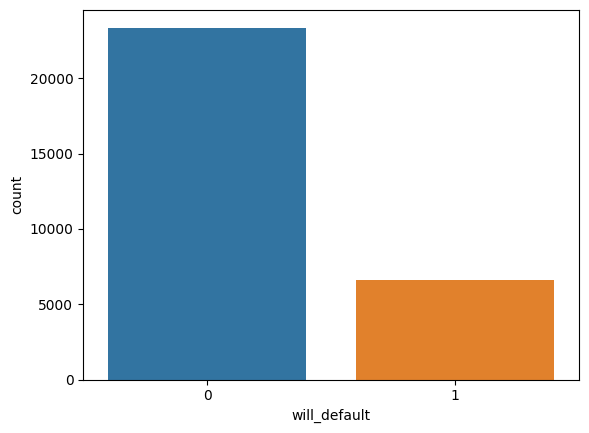

In [21]:
sns.countplot(
    data = df_new, x='will_default')

**Conclusion**
* Data is non equally distributed
* Non defaulters are much more in number than defaulters
* Will make it equally distributed using SMOTE

## Outliers

In [22]:
# Categorical and continuous columns
categorical_columns =[]
continuous_columns = []
for columns in df_new.columns:
    if df[columns].nunique() > 12:
        continuous_columns.append(columns)
    else:
        categorical_columns.append(columns)
continuous_columns

['ID',
 'LIMIT_BAL',
 'AGE',
 'bill_sept',
 'bill_aug',
 'bill_july',
 'bill_june',
 'bill_may',
 'bill_april',
 'previous_payment_sept',
 'previous_payment_aug',
 'previous_payment_july',
 'previous_payment_june',
 'previous_payment_may',
 'previous_payment_april']

In [23]:
categorical_columns.pop()

'will_default'

In [24]:
categorical_columns

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'code_repayment_sept',
 'code_repayment_aug',
 'code_repayment_july',
 'code_repayment_june',
 'code_repayment_may',
 'code_repayment_april']

### Bivariate Analysis

#### Limited Balance vs Categorical columns

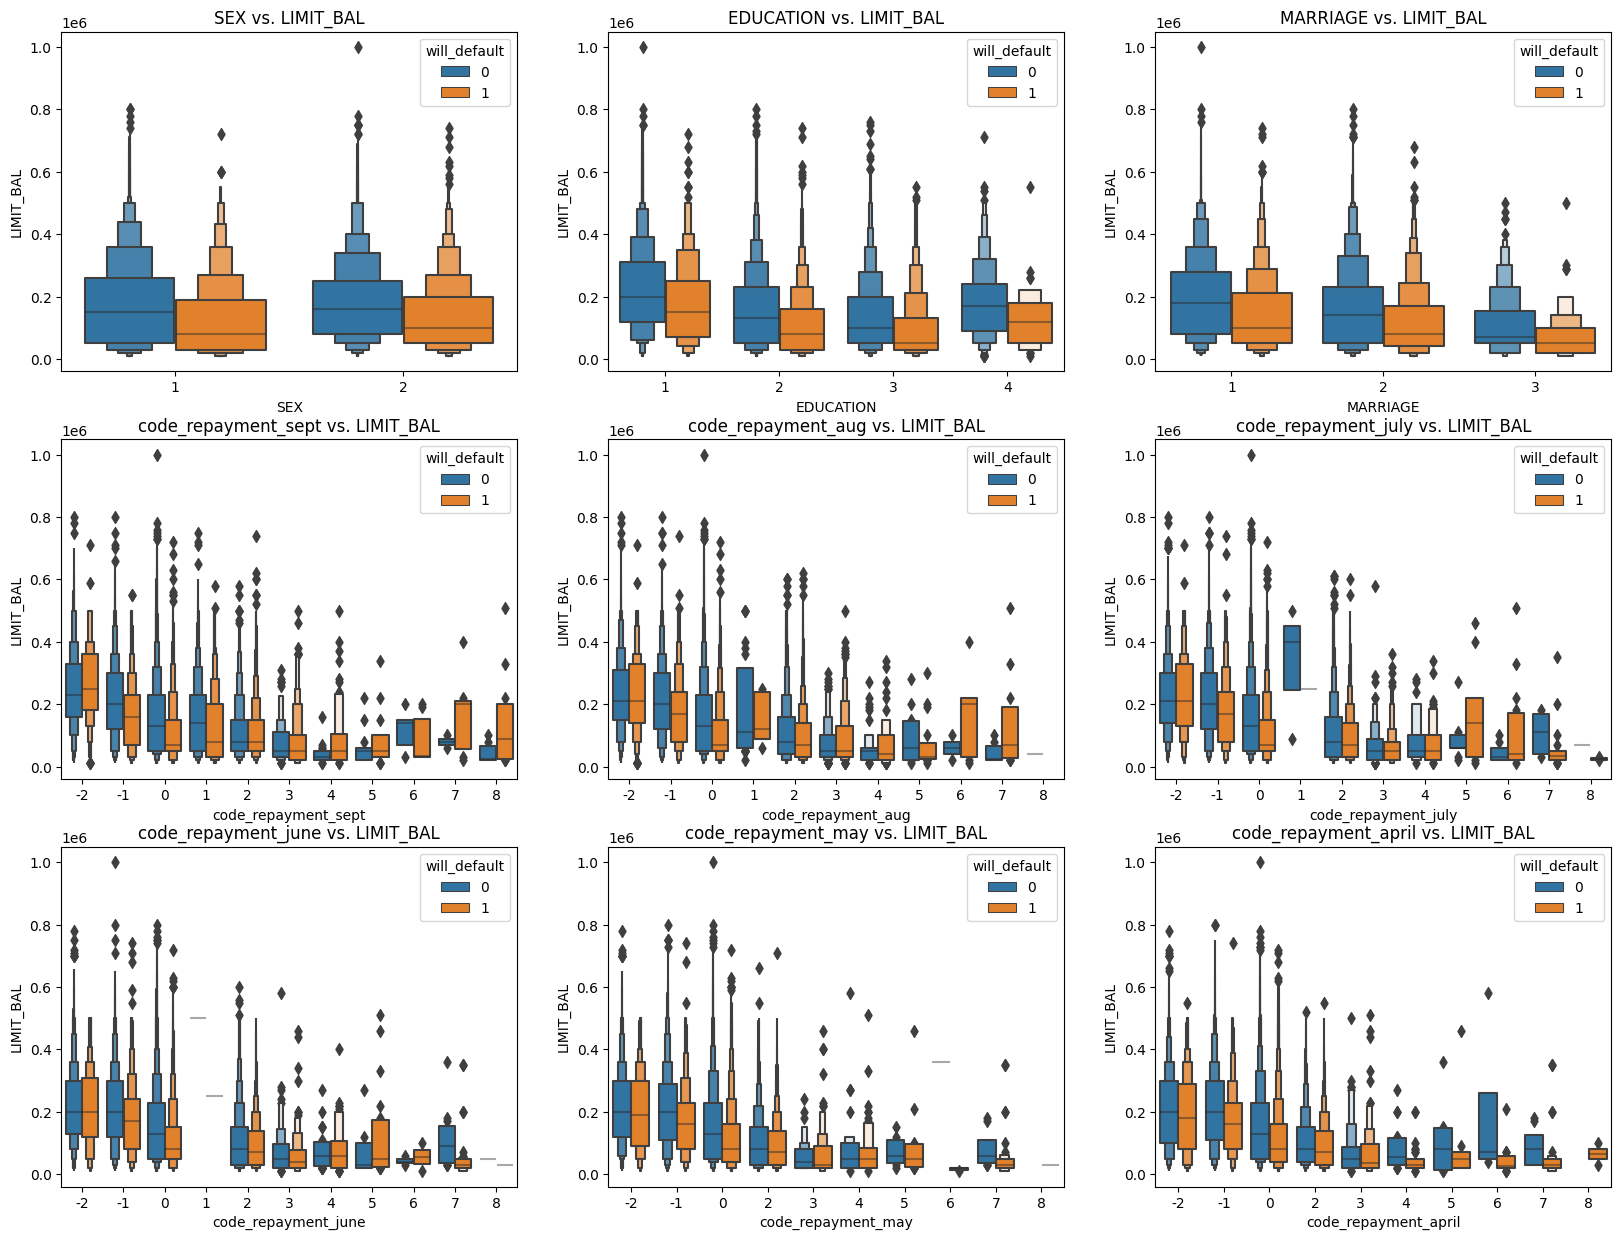

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, categorical_col in enumerate(categorical_columns):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    sns.boxenplot(data=df_new, y='LIMIT_BAL', x=categorical_col, hue='will_default', ax=ax)
    ax.set_title(f'{categorical_col} vs. LIMIT_BAL')

plt.show()


**Conclusion**

* Outliers Consideration: Many outliers are present in the dataset, and these outliers may hold valuable information for our model.
* Information Retention: **Removing these outliers may result in the loss of valuable information**, and careful consideration is required when deciding how to handle them in the modeling process.

#### Age vs Categorical columns

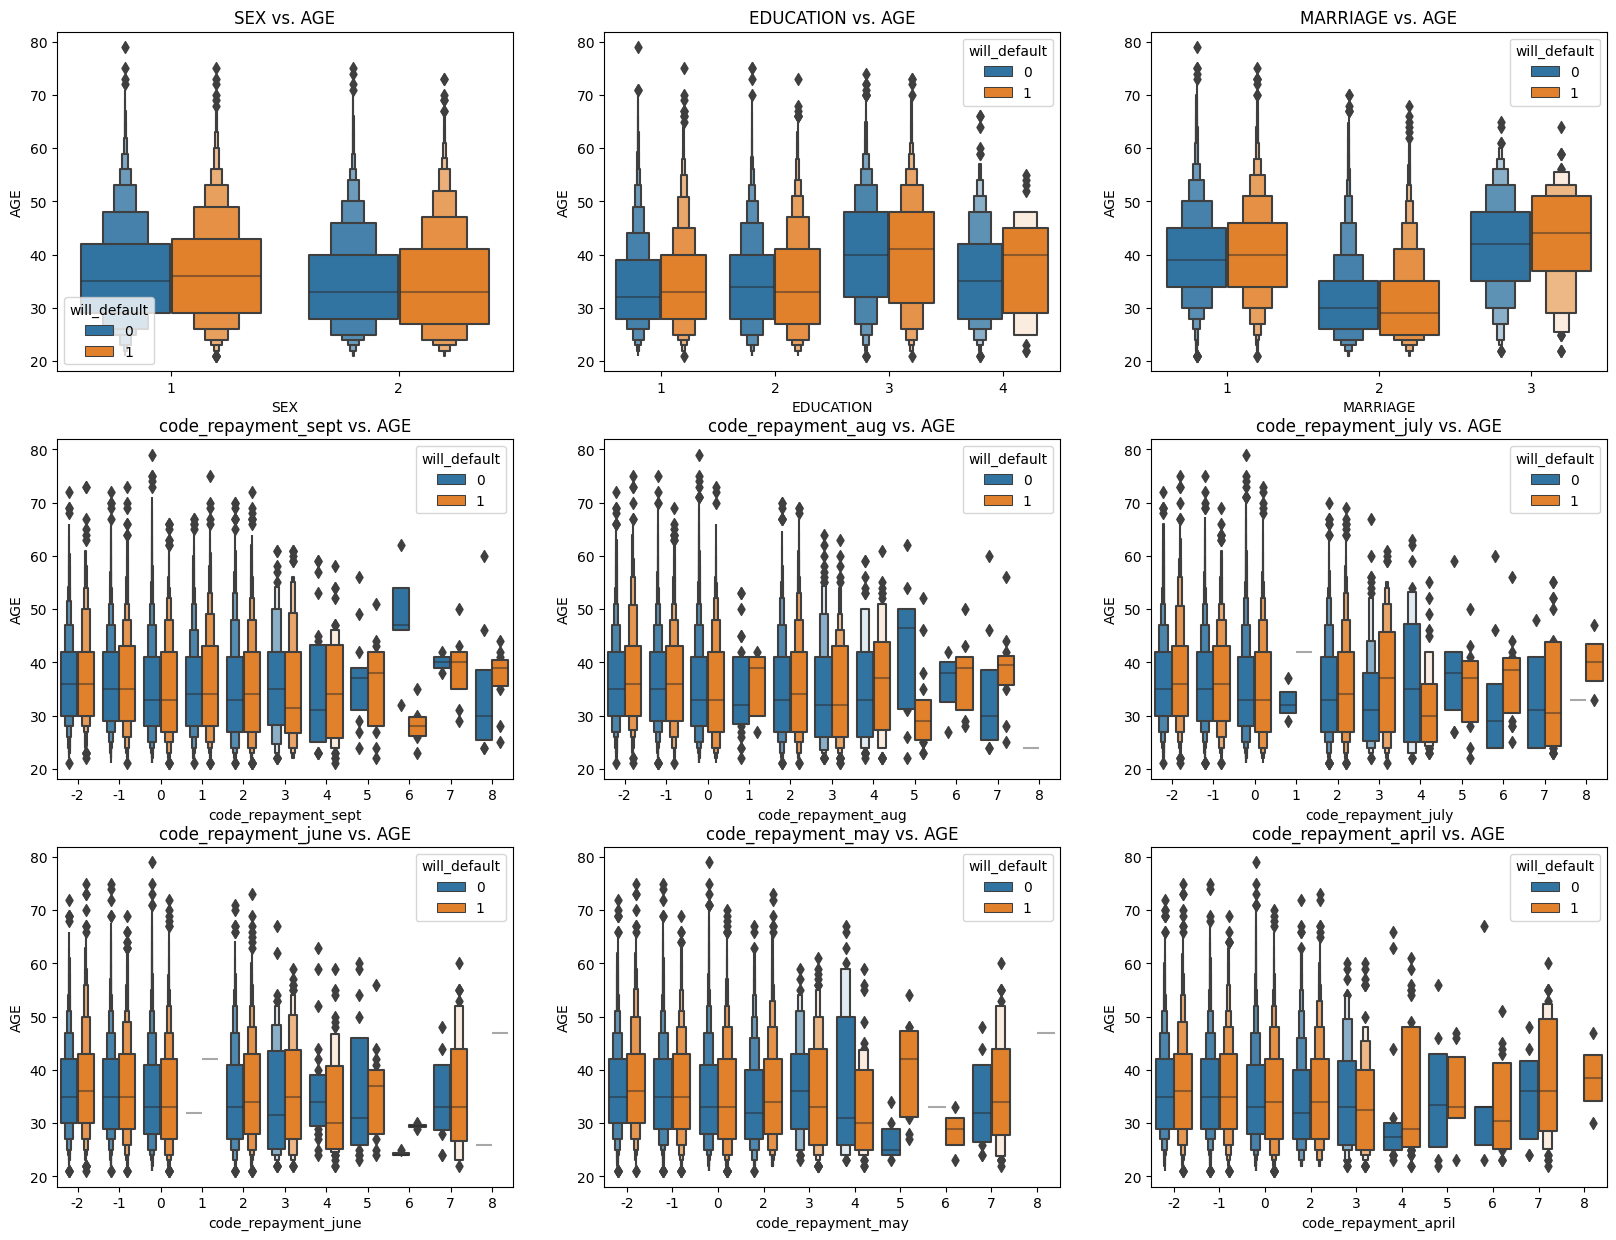

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, categorical_col in enumerate(categorical_columns):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    sns.boxenplot(data=df_new, y='AGE', x=categorical_col, hue='will_default', ax=ax)
    ax.set_title(f'{categorical_col} vs. AGE')

plt.show()



**Conclusion**
* Age Outliers: The feature "Age" also exhibits a similar number of outliers as observed in the limited balance.
* Future Approach: Our plan is to leave the "Age" feature as it is, considering the presence of outliers.

#### Univariate analysis of Repayment status feature

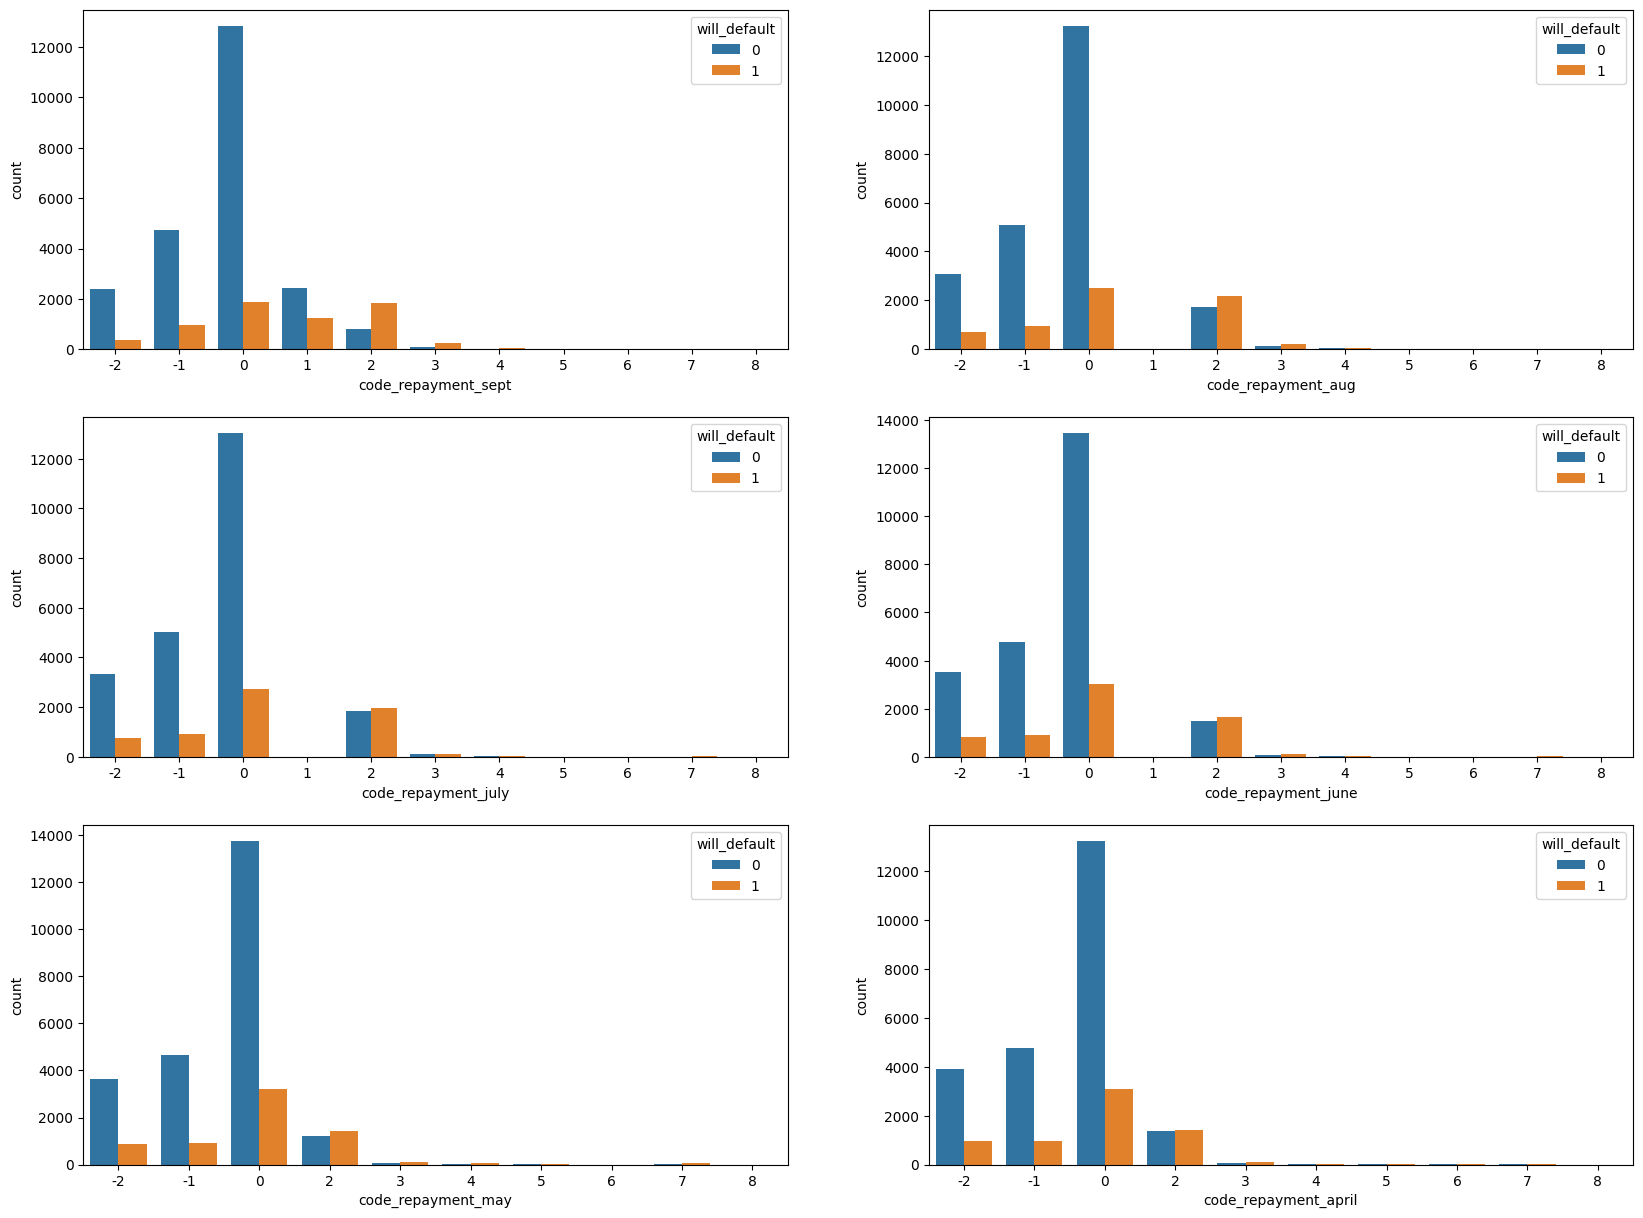

In [27]:
code_months_columns = df_new.loc[:,'code_repayment_sept': 'code_repayment_april'].columns
figure, axes = plt.subplots(3,2,figsize=(20,15))
for i,column in enumerate(code_months_columns):
    row , col = divmod(i,2)
    ax=axes[row,col]
    sns.countplot(data =df_new, x=column,hue='will_default',ax=ax)

**Interpretations**
* Usage of Revolving Credit: The dataset reveals that, irrespective of being a defaulter or non-defaulter, a significant number of users are engaged with revolving credit services.
* Defaulters with Revolving Credit: Notably, even among defaulters, a substantial number of individuals utilize revolving credit services.
* Rare Extended Delays: There are very few instances where users have delayed their payments for four months or more. This suggests that a vast majority of users tend to make timely payments

#### Bivariate analysis[AGE and MARRIAGE]

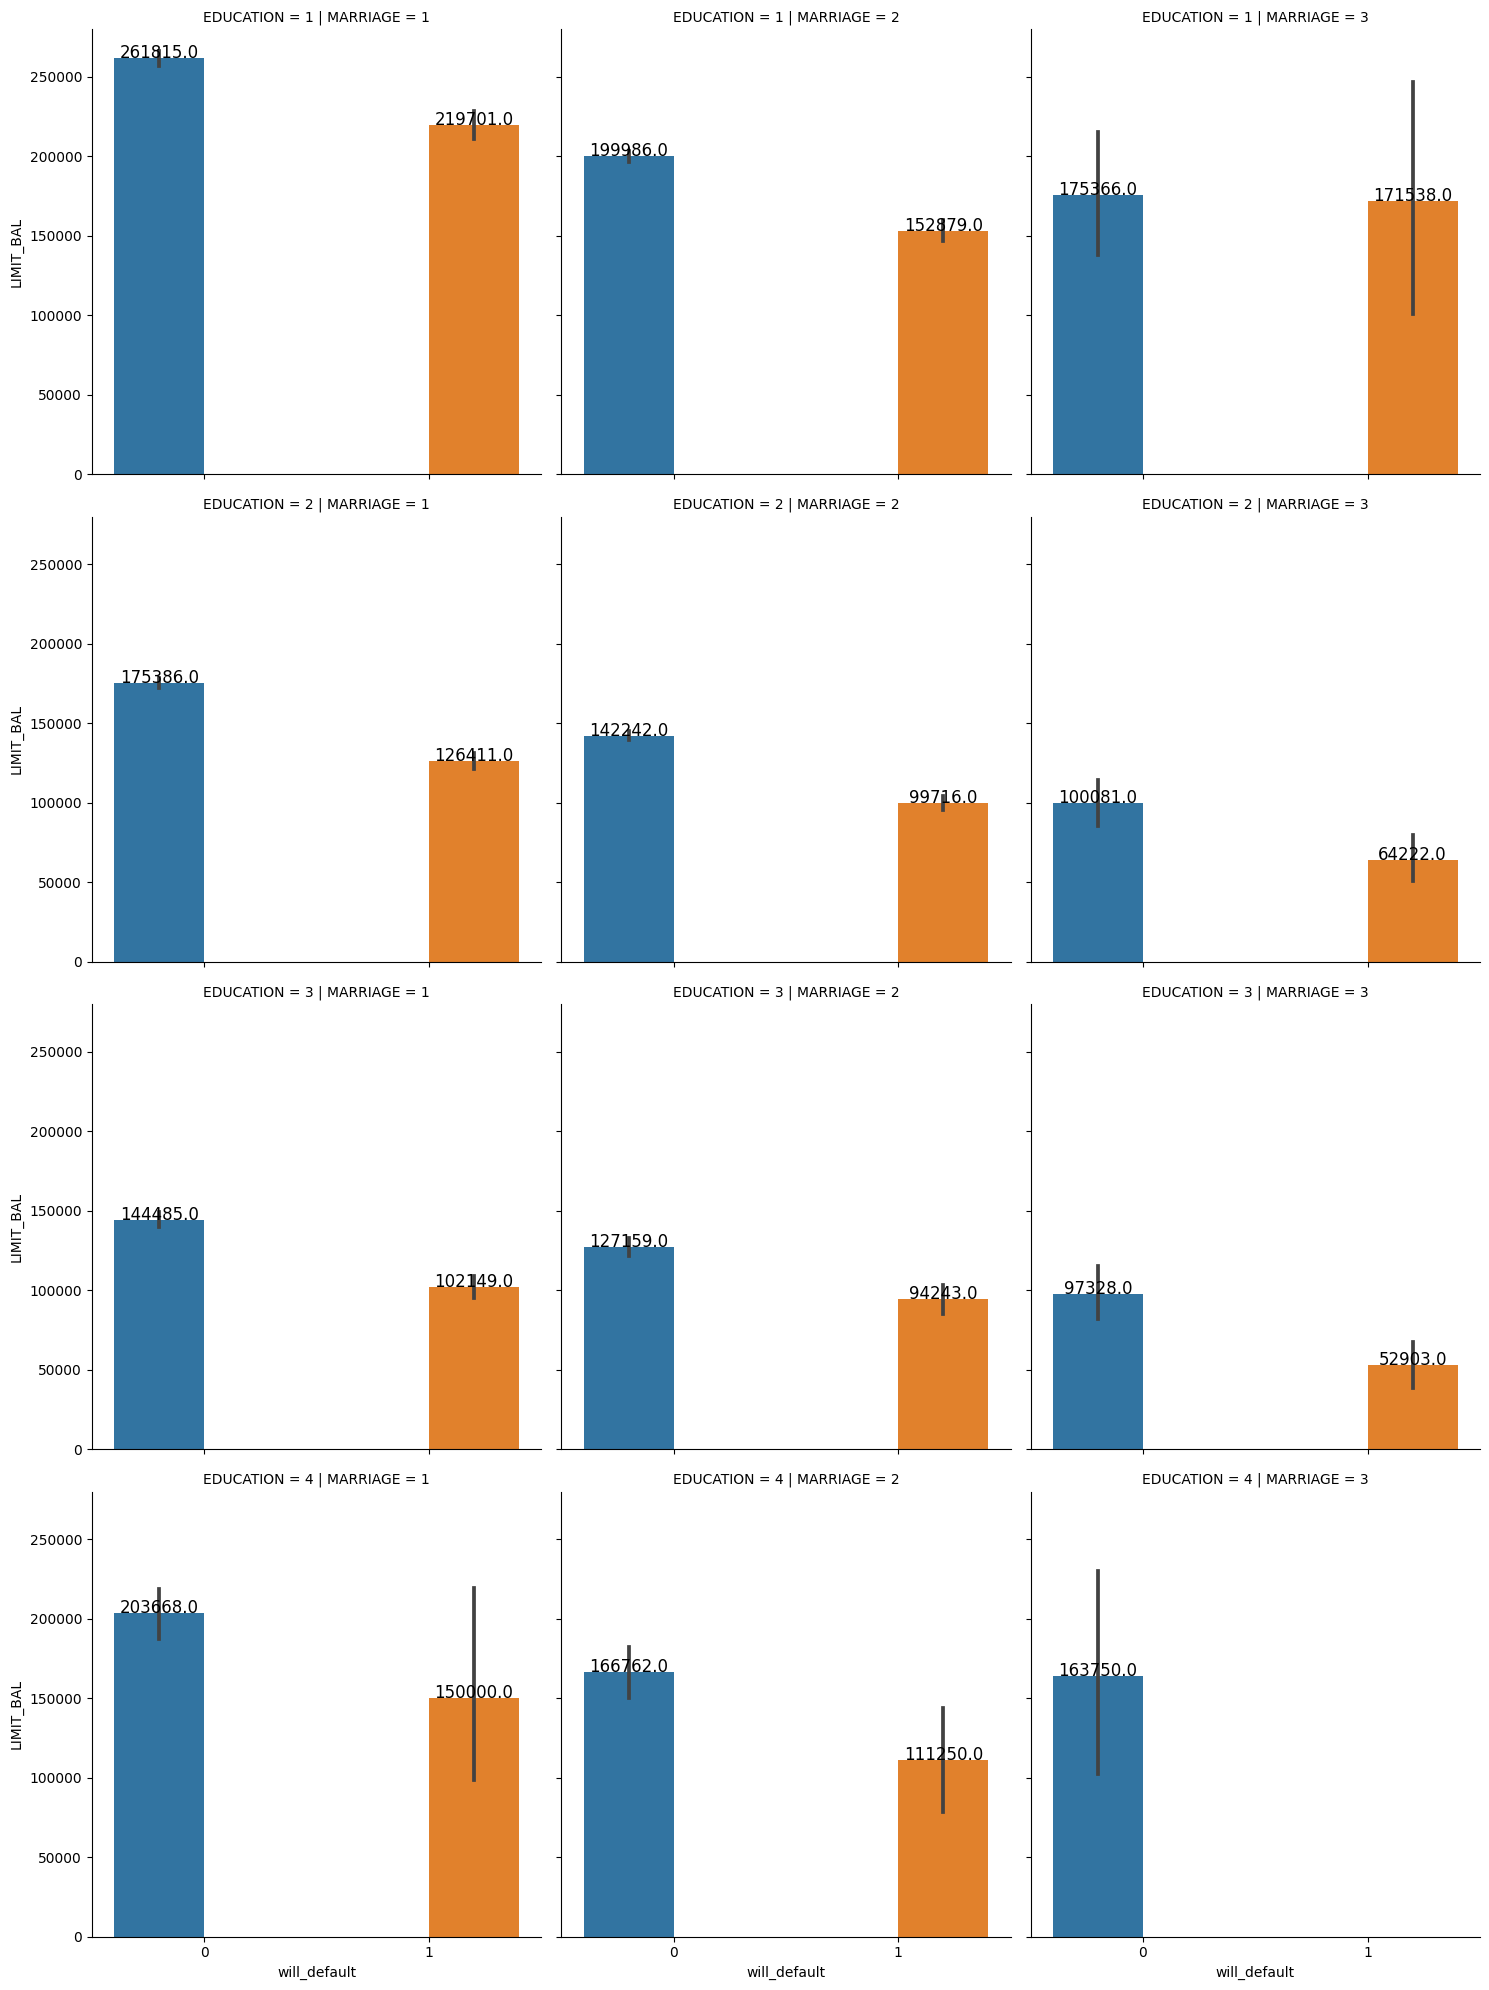

In [28]:
g = sns.catplot(
    data = df_new, x = 'will_default',col= 'MARRIAGE',row = 'EDUCATION',y = 'LIMIT_BAL',kind = 'bar',hue = 'will_default'
)
for ax in g.axes.flat:
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x,y, f'{round(float(y),0)}', ha='center',fontsize=12)


**Conclusion**

* **Marital Status Influence:** It's observed that, in general, married users tend to utilize credit services more frequently than single users.
* **Marriage and Education Impact:** Users belonging to the married category and having a graduate education background are notably more inclined to use credit services compared to other combinations of marital status and education levels.
* **Default Patterns:** Users who do not have a graduate, university, or high school education tend to exhibit a higher default rate of approximately 30%-40%, regardless of their marital status.
* **Risk in Graduate Users with 'Other' Category:** Graduate users categorized as 'Other' demonstrate a substantial 50% chance of defaulting on their credit card payments.

### Univariate Analysis

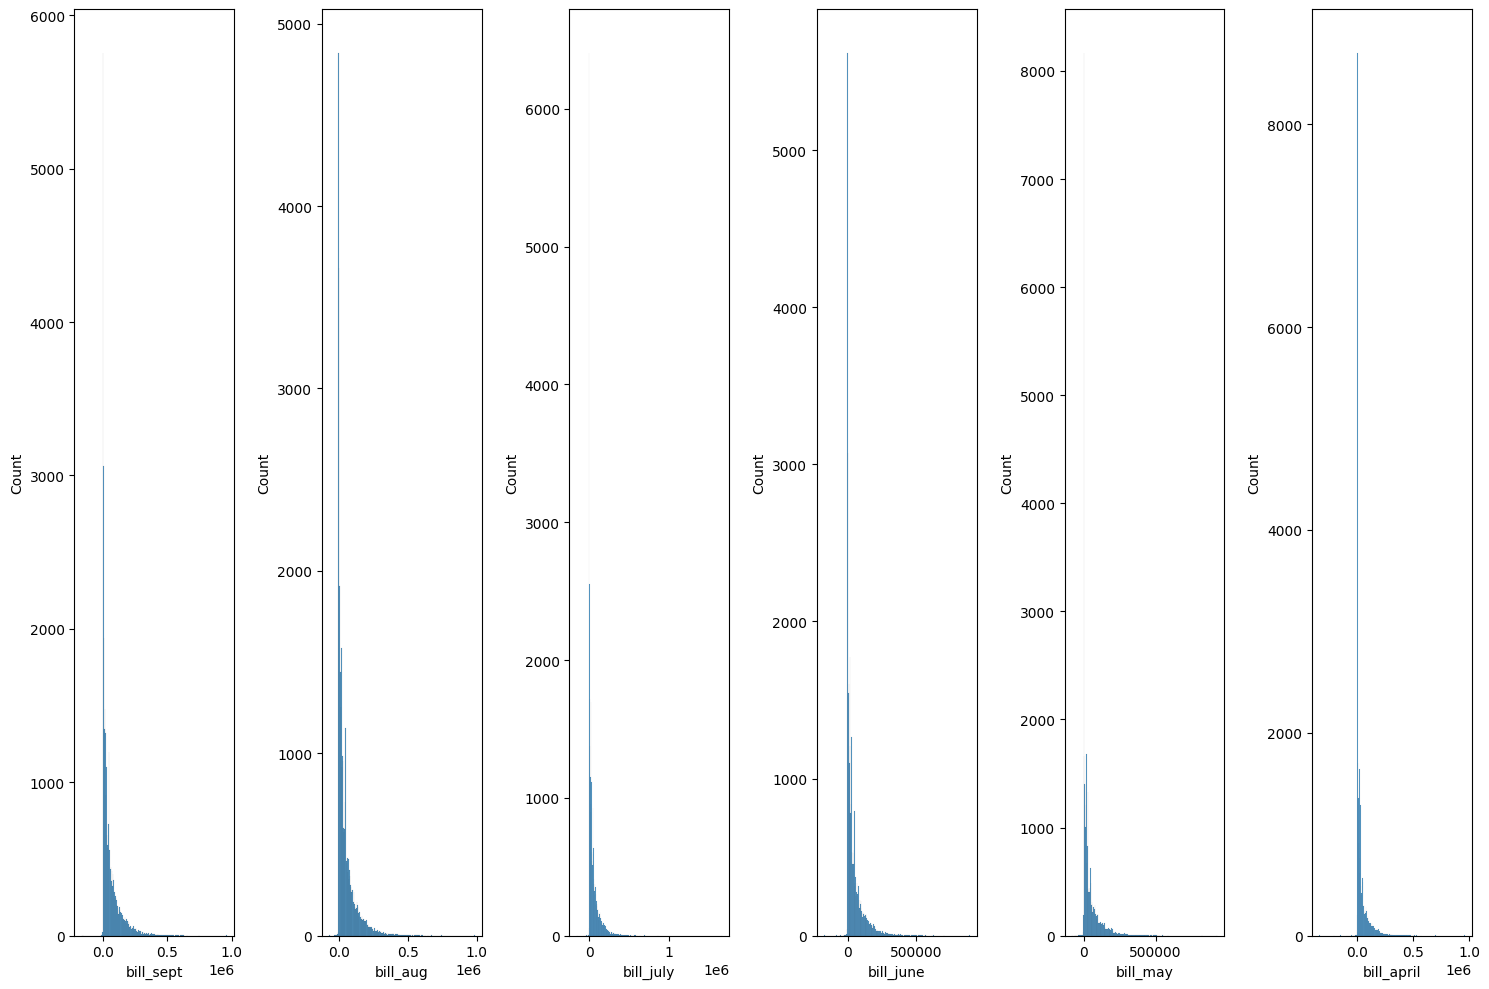

In [29]:
# previous bills
Previous_bills = ['bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may',
                  'bill_april']
fig, ax = plt.subplots(1,6, figsize=(15,10))
for i,bill_columns in enumerate(Previous_bills):
    sns.histplot(
        data = df_new, x = bill_columns,ax=ax[i]
    )
    plt.tight_layout()

* **Interpretations**
 **Bill Amount Skewness:** Across all months, the bill amounts exhibit a high degree of skewness. This indicates that the distributions are significantly asymmetric, which can impact the modeling and analysis process.
* **Presence of Negative Bill Values:** Notably, some of the bill amounts contain negative values, signifying credit balances or overpayments, which should be carefully considered when analyzing financial behavior

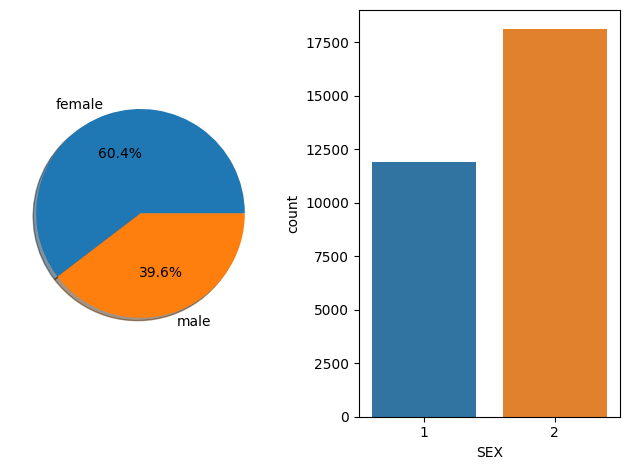

In [30]:
df_new['SEX'].value_counts()
labels = ['female','male']
values = df_new['SEX'].value_counts().values

fig, ax = plt.subplots(1,2)
ax[0].pie(values, labels = labels, autopct='%1.1f%%', shadow = True)
sns.countplot(
    data = df_new, x = 'SEX', ax=ax[1]
)
plt.tight_layout()
plt.show()

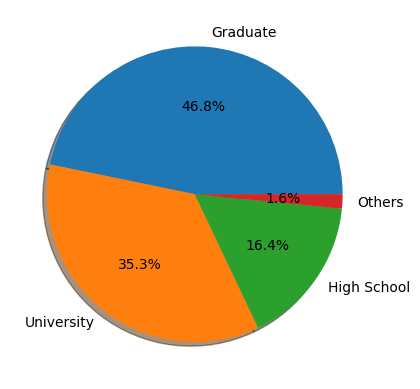

In [31]:
df_new['EDUCATION'].value_counts()
labels = ['Graduate','University','High School','Others']
values = df_new['EDUCATION'].value_counts().values

fig, ax = plt.subplots()
ax.pie(values, labels = labels, autopct='%1.1f%%', shadow = True)
plt.show()

* Almost 50% data covers Graduate section 

Text(0.5, 0, 'Limited Balance')

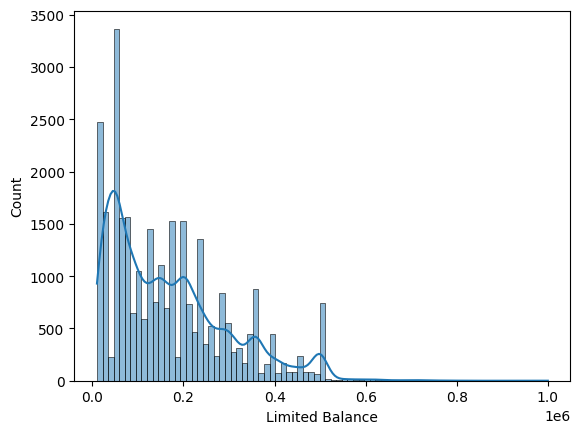

In [32]:
# Limited balance
sns.histplot(
    df_new['LIMIT_BAL'], kde=True
)
plt.xlabel('Limited Balance')

**Interpretations**
* Highly skewed distribution

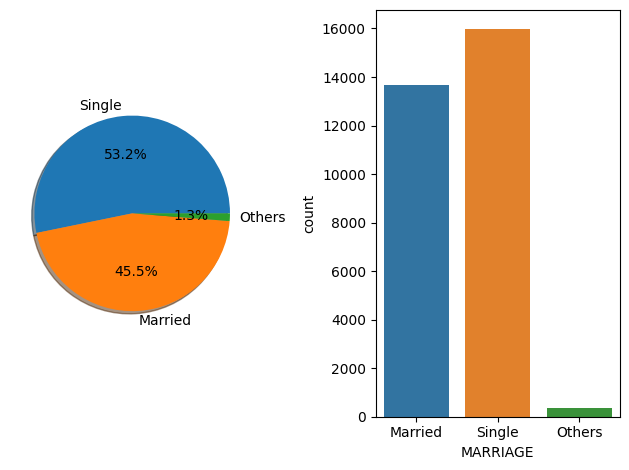

In [33]:
df_new['MARRIAGE'].value_counts()
labels = ['Single','Married','Others']
values = df_new['MARRIAGE'].value_counts().values

fig, ax = plt.subplots(1,2)
ax[0].pie(values, labels = labels, autopct='%1.1f%%', shadow = True)
sns.countplot(
    data = df_new, x = 'MARRIAGE', ax=ax[1]
)
ax[1].set_xticklabels(['Married','Single','Others'])
plt.tight_layout()
plt.show()

<Axes: xlabel='AGE', ylabel='Count'>

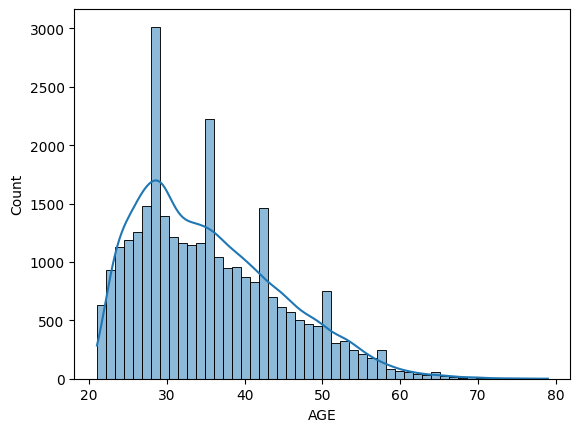

In [34]:
sns.histplot(
    df['AGE'] , kde=True, bins = 50
)

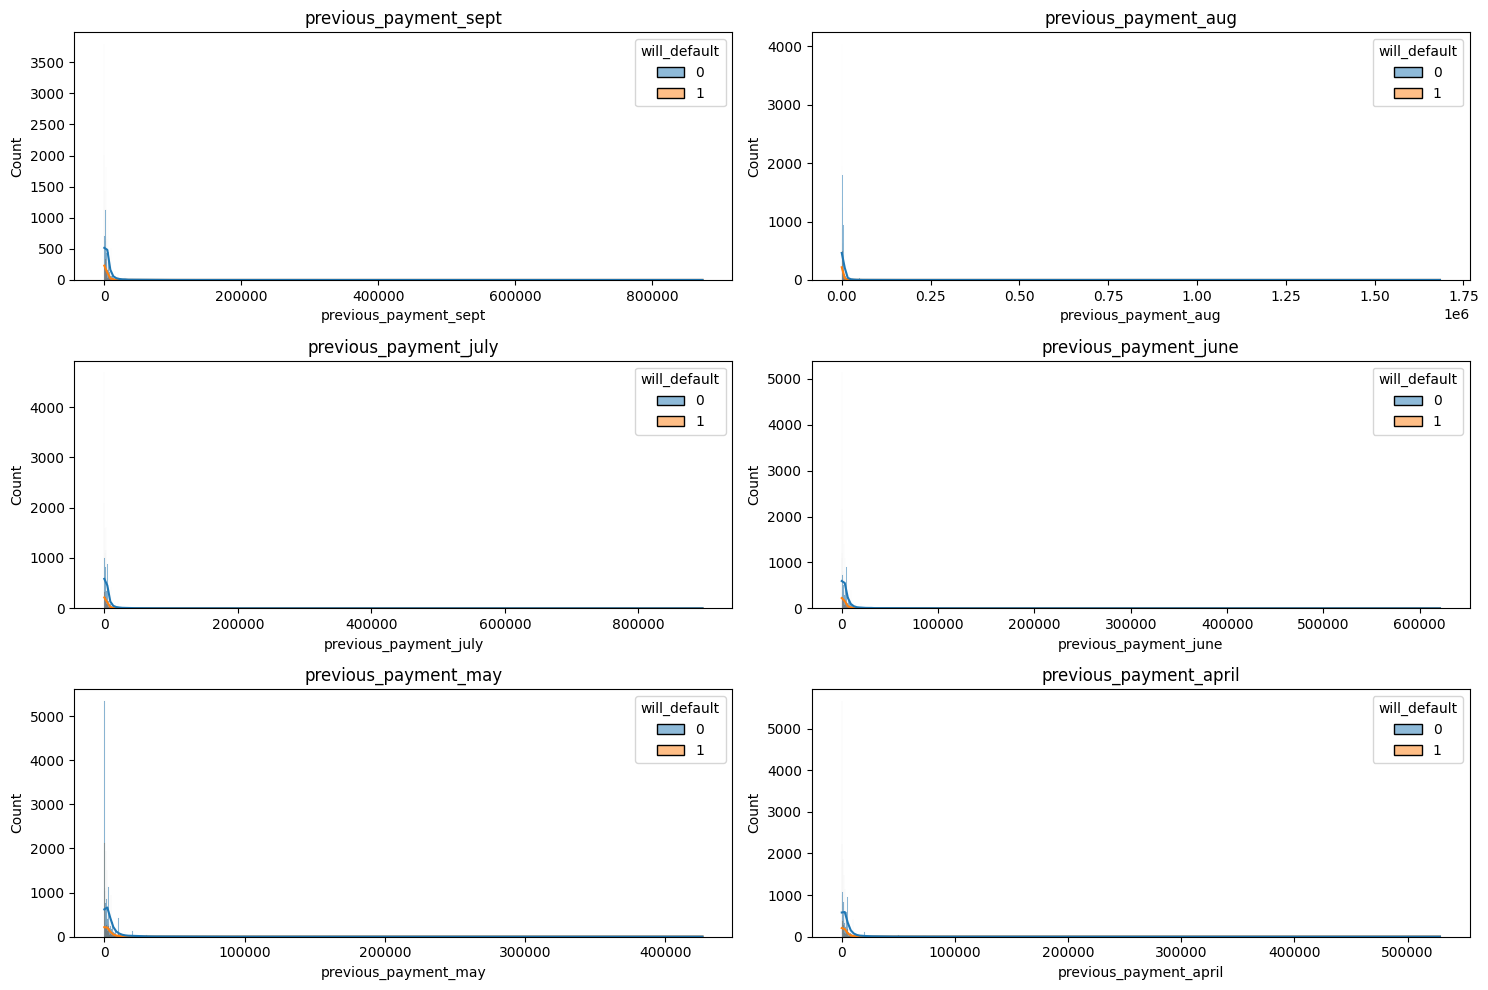

In [35]:
# Previous payments
previous_payment_months=df.columns[df_new.columns.str.startswith('previous_payment')]
fig, ax = plt.subplots(3,2,figsize=(15,10))
for axes,column in zip(ax.ravel(),previous_payment_months): 
    sns.histplot(
        data = df_new,x=column , kde=True, hue='will_default', ax=axes
    )
    
    axes.set_title(f'{column}')
    
plt.tight_layout()

**Interpretations**
* Bill Amount Skewness: Across all months, the bill amounts exhibit a high degree of skewness. This indicates that the distributions are significantly asymmetric, which can impact the modeling and analysis process.
* Presence of Negative Bill Values: Notably, some of the bill amounts contain negative values, signifying credit balances or overpayments, which should be carefully considered when analyzing financial behavior.

# Feature Engineering

## Handling Unbalanced dataset using SMOTE

In [36]:
# Preserve original dataset 
df_smote = df.copy()

<Axes: xlabel='bill_sept', ylabel='LIMIT_BAL'>

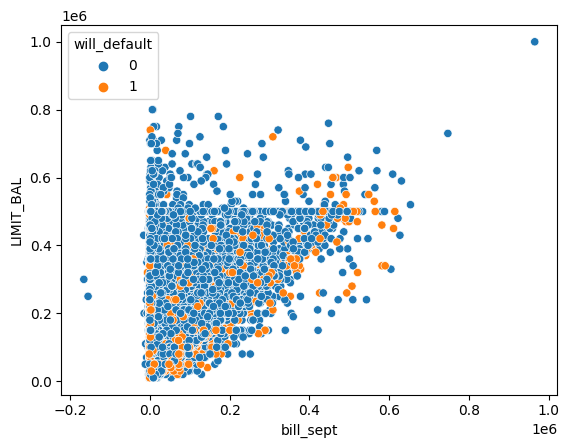

In [37]:
sns.scatterplot(
    data = df_new, x='bill_sept',y = 'LIMIT_BAL', hue= 'will_default',
)


**Interpretations**
* Non defaulters are outperforming in a very large number
* Need to balance the dataset by oversampling

In [38]:
oversample = SMOTE()
X_input , y_output = df_smote.iloc[:,:-1],df_smote[['will_default']]
X,y = oversample.fit_resample(X_input,y_output)
print('Shape of X {}'.format(X.shape))
print('Shape of y {}'.format(y.shape))
df_smote = pd.concat([X,y],axis=1)
print('Normal distributed dataset shape {}'.format(df_smote.shape))

Shape of X (46728, 24)
Shape of y (46728, 1)
Normal distributed dataset shape (46728, 25)


In [39]:
print('After Handling Unbalanced dataset-')
df_smote['will_default'].value_counts()

After Handling Unbalanced dataset-


will_default
1    23364
0    23364
Name: count, dtype: int64

<Axes: xlabel='bill_sept', ylabel='LIMIT_BAL'>

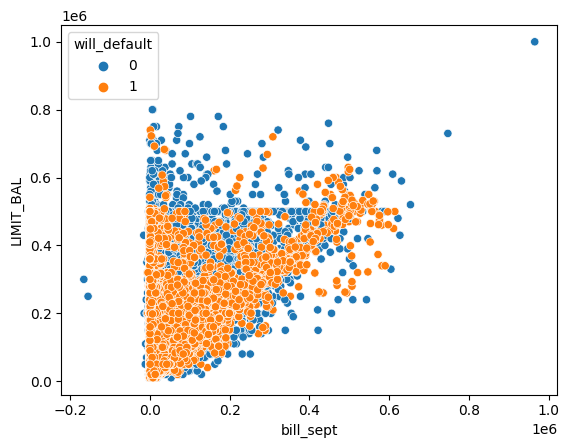

In [40]:
sns.scatterplot(
    data = df_smote, x='bill_sept',y = 'LIMIT_BAL',hue = 'will_default'
)

### Comparision between Unbalanced and Balanced data

Text(0.5, 1.0, 'BALANCED DATASET')

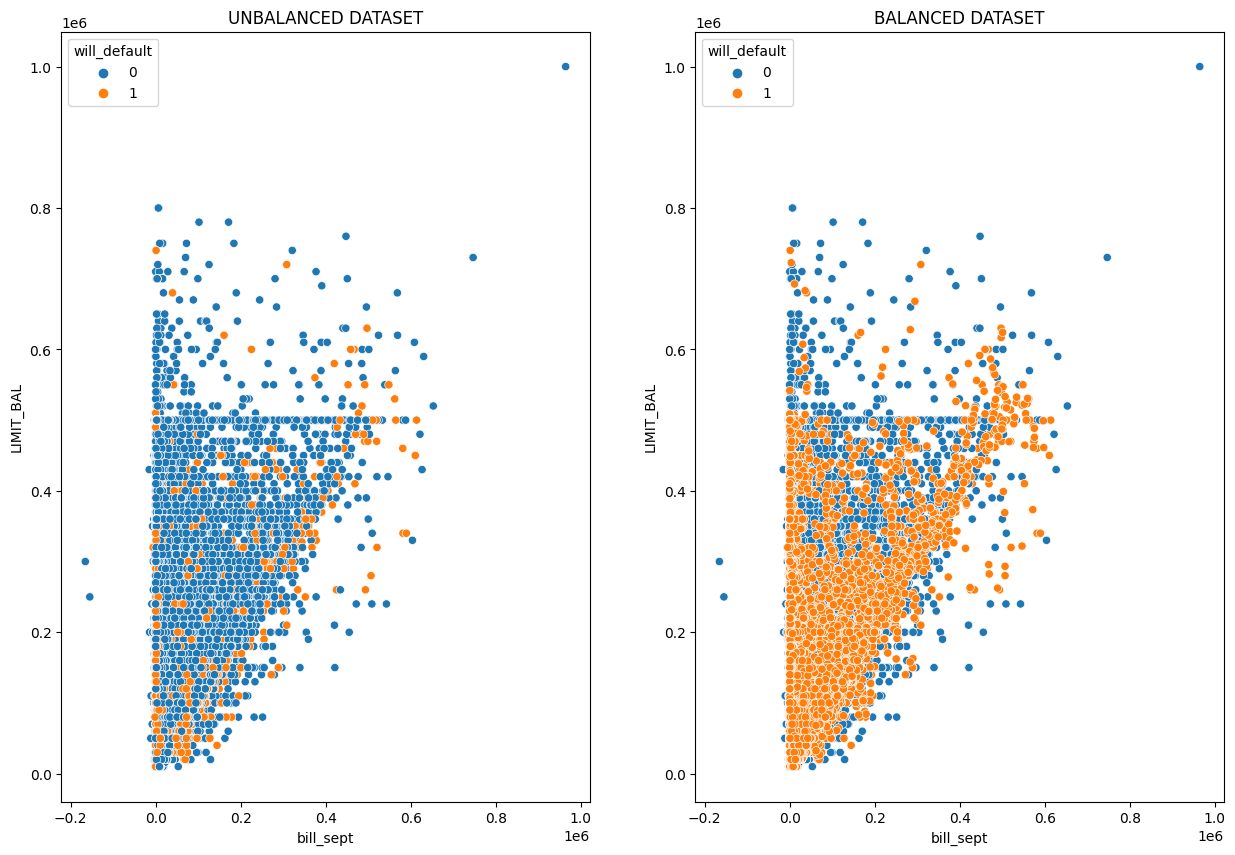

In [41]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
sns.scatterplot(
    data = df_new, x='bill_sept',y = 'LIMIT_BAL', hue= 'will_default',ax=ax[0],
)
ax[0].set_title('UNBALANCED DATASET')
sns.scatterplot(
    data = df_smote, x = 'bill_sept',y = 'LIMIT_BAL' , hue = 'will_default',ax=ax[1]
)
ax[1].set_title('BALANCED DATASET')

### Features Correlation

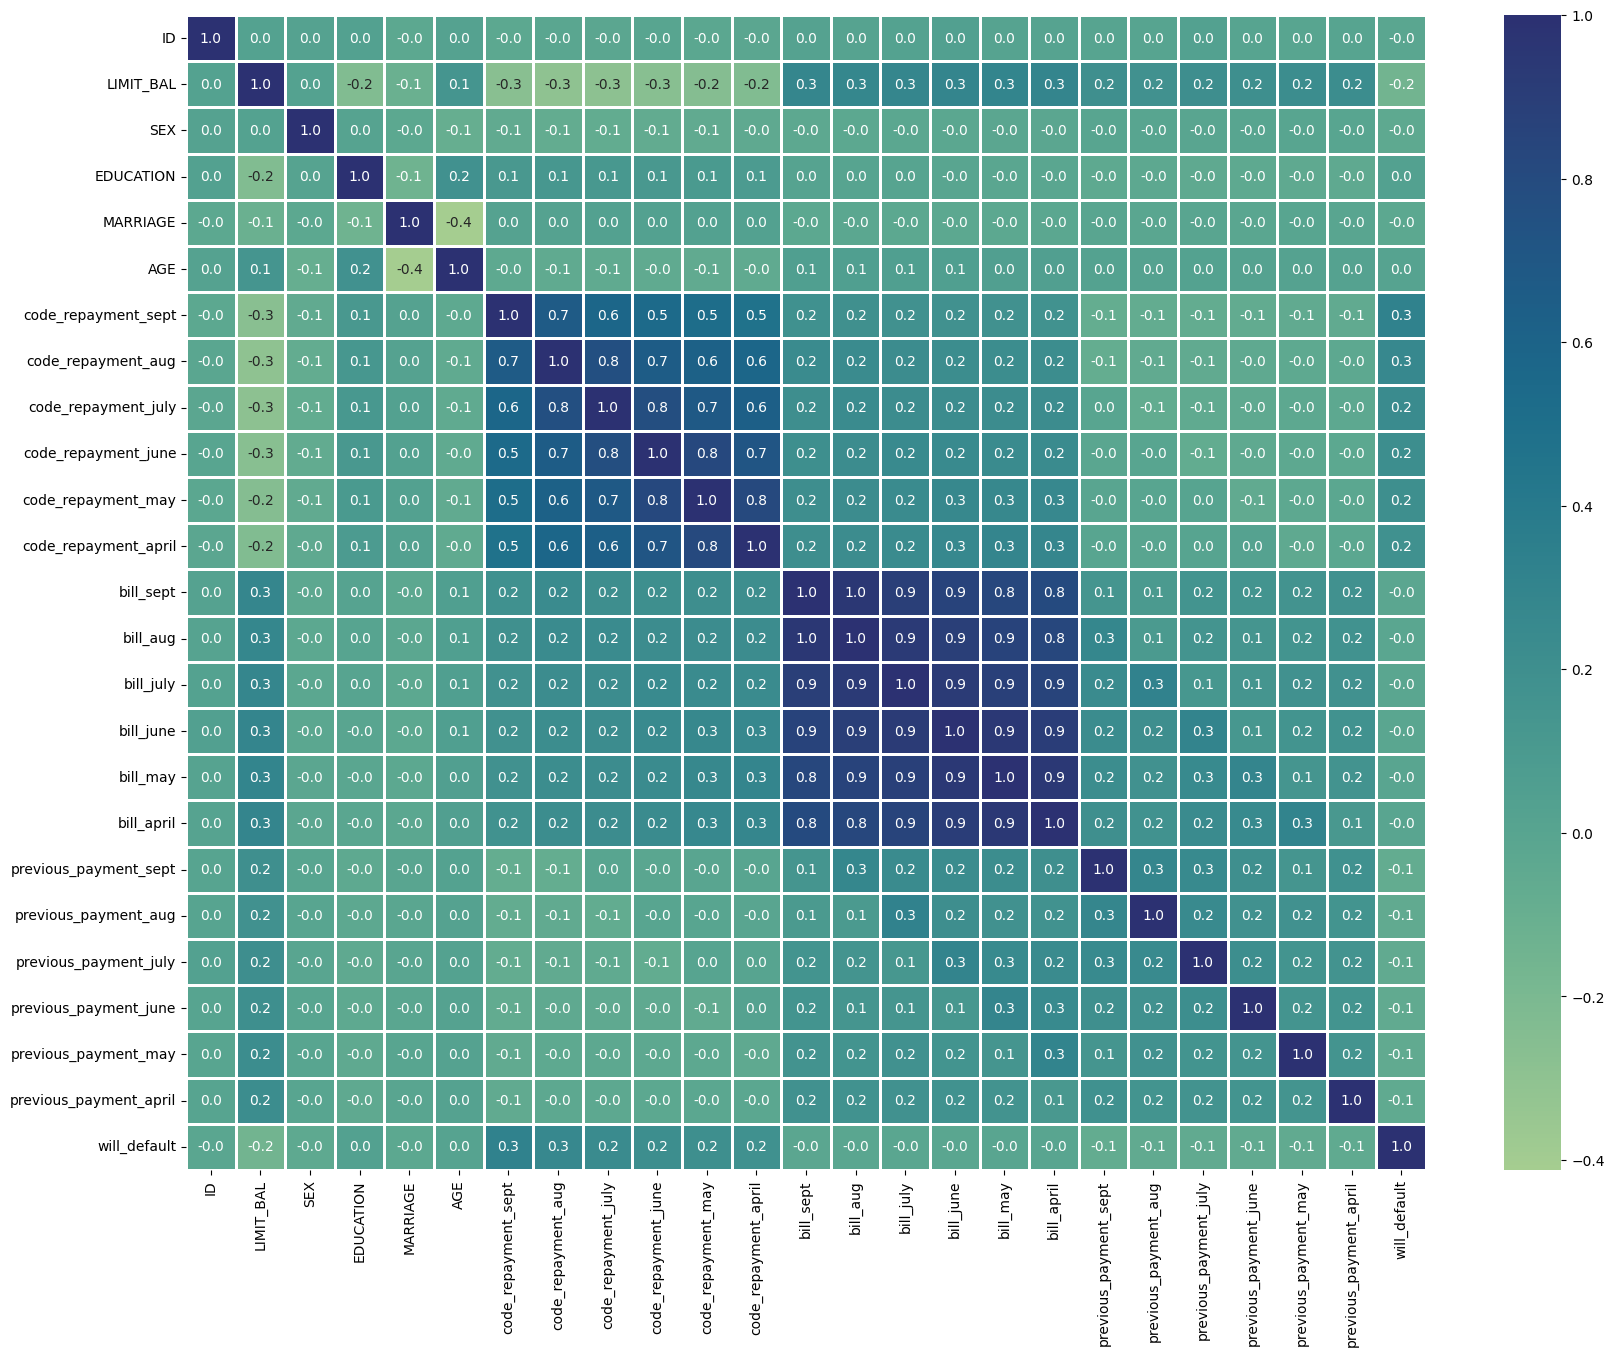

In [42]:
figure = plt.figure(figsize=(20,15))
sns.heatmap(
    data = df_new.corr(), annot=True, fmt = '0.1f', linewidths=1,cmap='crest'
)

plt.show()

**Interpretations**
* Limited balance feature shows positive relation with bill statement in all the months
* Marriage and age shows highly negative correlation

## Feature Reduction(Unbalanced Dataset)

In [43]:
df_new['Dues'] = df_new['bill_april'] + df_new['bill_aug'] + df_new['bill_july']+ df_new['bill_june'] + df_new['bill_may'] + df_new['bill_sept']
df_new['Previous_payments'] = df_new['previous_payment_april'] + df_new['previous_payment_aug']+df_new['previous_payment_july'] + df_new['previous_payment_june']+df_new['previous_payment_may'] + df_new['previous_payment_sept']

**Motive**
* **Model Complexity:** Dealing with a large number of columns for each month's bills can significantly increase the complexity of the predictive models. Simplifying the feature space is essential for efficient model development.
* **Continuous Features:** As both the bills and previous payments are continuous features, combining them into a single feature is expected to reduce dimensionality while retaining valuable information. This can lead to more streamlined and interpretable models.
* **Caution with Categorical Features:** It's important to note that the feature engineering technique should not be applied to the 'payment_code' feature since it is categorical in nature and requires a different approach to maintain its categorical meaning.

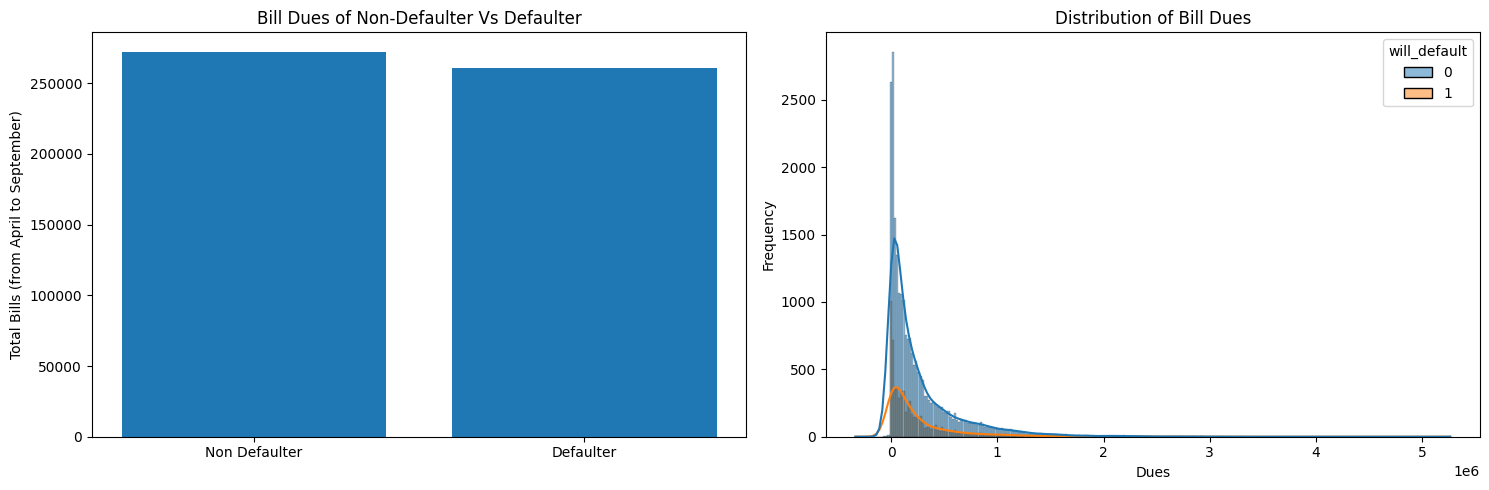

In [44]:
df_new_grouped = df_new.groupby('will_default')['Dues'].mean()
label = ['Non Defaulter', 'Defaulter']
values = df_new_grouped.values

fig, ax = plt.subplots(1, 2, figsize=(15, 5))  # Create a 1x2 grid of subplots

# Subplot 1: Bar plot
ax[0].bar(label, values)
ax[0].set_title('Bill Dues of Non-Defaulter Vs Defaulter')
ax[0].set_ylabel('Total Bills (from April to September)')

# Subplot 2: Histogram
sns.histplot(data=df_new, x='Dues', hue='will_default', kde=True, ax=ax[1])
ax[1].set_title('Distribution of Bill Dues')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Conclusion**
* Bill amount for both category is almost same
* Both group shows similarity in terms of total purchases
* Negative values are still present in Dues feature

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

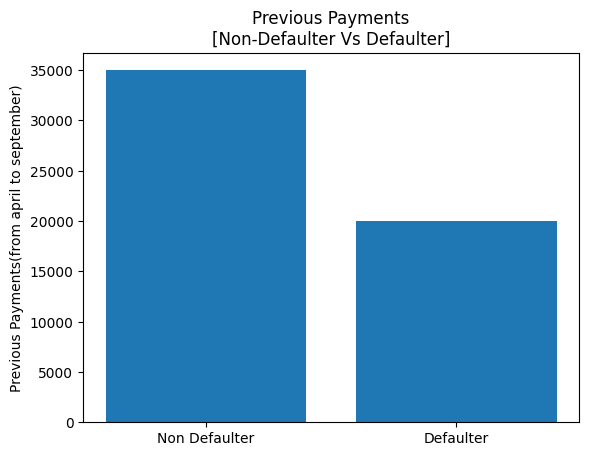

In [45]:
df_new.groupby('will_default')['Previous_payments'].mean()
label = ['Non Defaulter','Defaulter']
values = df_new.groupby('will_default')['Previous_payments'].mean().values
plt.bar(label, values)
plt.title('Previous Payments\n[Non-Defaulter Vs Defaulter]')
plt.ylabel('Previous Payments(from april to september)')
plt.tight_layout

**Conclusion**
* Previous payments of both the group made clear distinguish between a defaulter or a non defualter
* It can be the important feature for a model to train with

## Feature Engineering (Balanced dataset)

In [46]:
df_smote['Dues']= df_smote['bill_april']+ df_smote['bill_may'] + df_smote['bill_june']+ df_smote['bill_july']+ df_smote['bill_aug'] + df_smote['bill_sept']
df_smote['Previous_payments'] = df_smote['previous_payment_april'] + df_smote['previous_payment_may'] + df_smote['previous_payment_june'] + df_smote['previous_payment_july'] + df_smote['previous_payment_aug'] + df_smote['previous_payment_sept']

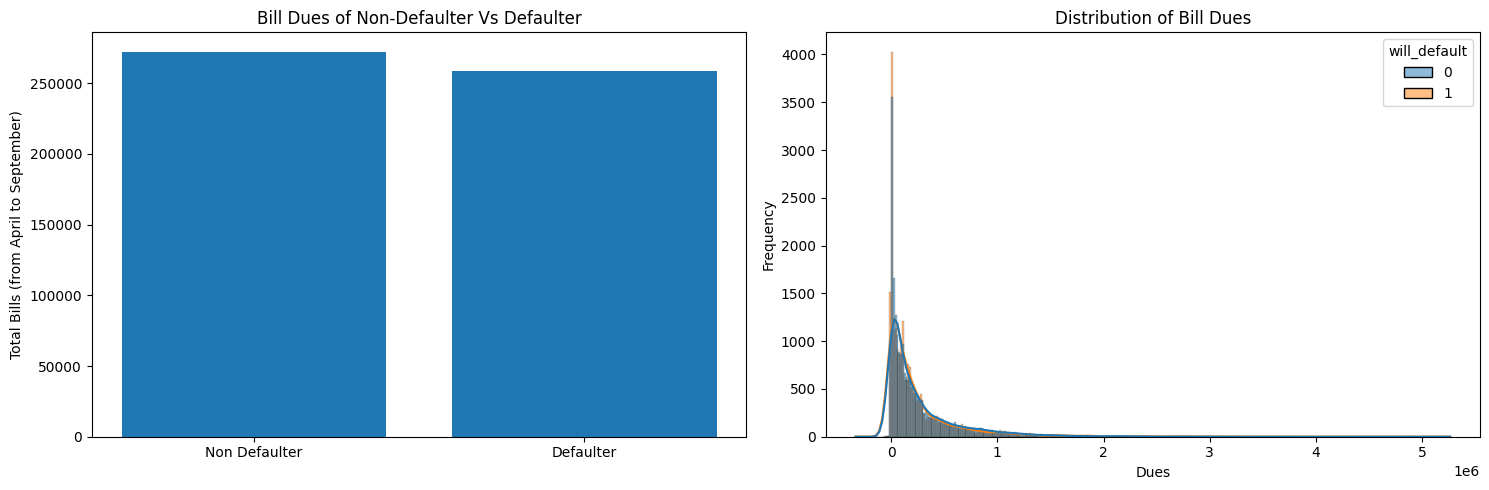

In [47]:
df_smote_grouped = df_smote.groupby('will_default')['Dues'].mean()
label = ['Non Defaulter', 'Defaulter']
values = df_smote_grouped.values

fig, ax = plt.subplots(1, 2, figsize=(15, 5))  # Create a 1x2 grid of subplots

# Subplot 1: Bar plot
ax[0].bar(label, values)
ax[0].set_title('Bill Dues of Non-Defaulter Vs Defaulter')
ax[0].set_ylabel('Total Bills (from April to September)')

# Subplot 2: Histogram
sns.histplot(data=df_smote, x='Dues', hue='will_default', kde=True, ax=ax[1])
ax[1].set_title('Distribution of Bill Dues')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

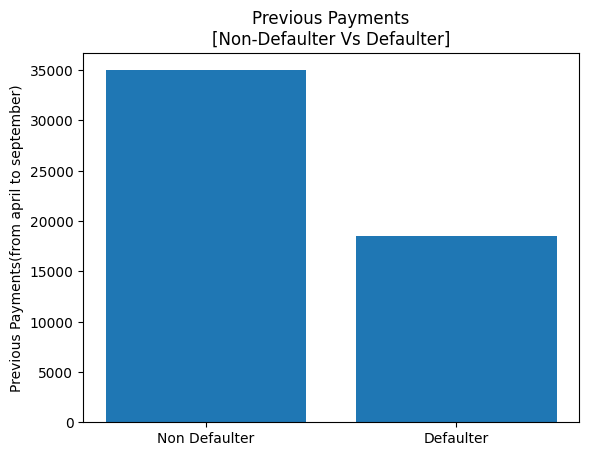

In [48]:
df_smote.groupby('will_default')['Previous_payments'].mean()
label = ['Non Defaulter','Defaulter']
values = df_smote.groupby('will_default')['Previous_payments'].mean().values
plt.bar(label, values)
plt.title('Previous Payments\n[Non-Defaulter Vs Defaulter]')
plt.ylabel('Previous Payments(from april to september)')
plt.tight_layout

**Interpretations**
* Proportion of non-defaulters and defaulters is maintained 

# Feature Scaling

## Analysing best feature scaling technique for this dataset on feature -*Previous months payments*

In [49]:
import pandas as pd
import numpy as np

log_transformed_columns = []

# Create a DataFrame to store the log-transformed values
log_transformed_previous_month_payment_df = pd.DataFrame()

for column in previous_payment_months:
    log_column_name = 'log_' + column
    log_transformed_columns.append(log_column_name)

    # Calculate the log-transformed values and add them to the DataFrame
    log_transformed_previous_month_payment_df[log_column_name] = df_new[column].apply(lambda x: np.log(x) if x > 0 else 0)

# Now you have a DataFrame with log-transformed values for each column


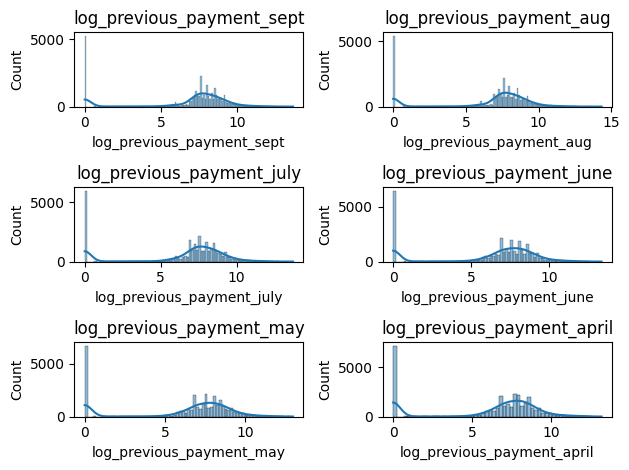

In [50]:

fig, ax = plt.subplots(3,2)
for axes,column in zip(ax.ravel(),log_transformed_columns):
    sns.histplot(
        data = log_transformed_previous_month_payment_df,x=column , kde=True, ax=axes
    )

    axes.set_title(f'{column}')

plt.tight_layout()

In [51]:
# Normalizer (L1) norm

# Create a DataFrame to store the log-transformed values
l1_norm_transformed_previous_month_payment_df = pd.DataFrame(index=df.index)
normalize= Normalizer(norm='l1')
for column in previous_payment_months:
    l1_norm_column_name = 'l1_norm_' + column
    normalize.fit(df[[column]])
    normalized_data = normalize.fit_transform(df[[column]])
    l1_norm_transformed_previous_month_payment_df[l1_norm_column_name] = normalized_data


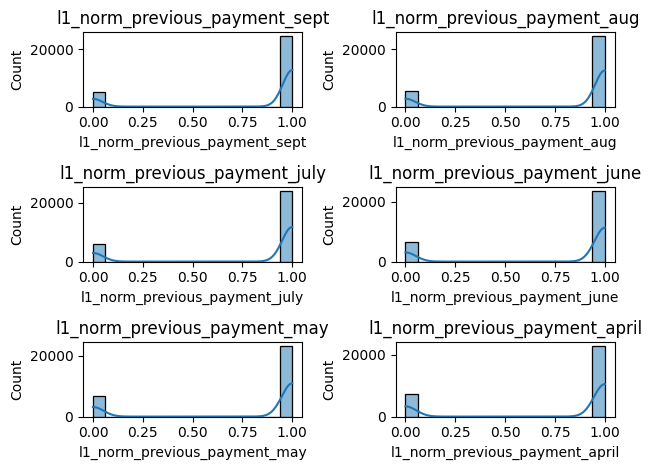

In [52]:

fig, ax = plt.subplots(3,2)
for axes,column in zip(ax.ravel(),l1_norm_transformed_previous_month_payment_df.columns):
    sns.histplot(
        data = l1_norm_transformed_previous_month_payment_df,x=column , kde=True, ax=axes
    )

    axes.set_title(f'{column}')

plt.tight_layout()

In [53]:
# Normalizer (L2) norm

# Create a DataFrame to store the log-transformed values
l2_norm_transformed_previous_month_payment_df = pd.DataFrame(index=df.index)
normalize= Normalizer(norm='l2')
for column in previous_payment_months:
    l2_norm_column_name = 'l2_norm_' + column
    normalize.fit(df[[column]])
    normalized_data = normalize.fit_transform(df[[column]])
    l2_norm_transformed_previous_month_payment_df[l2_norm_column_name] = normalized_data


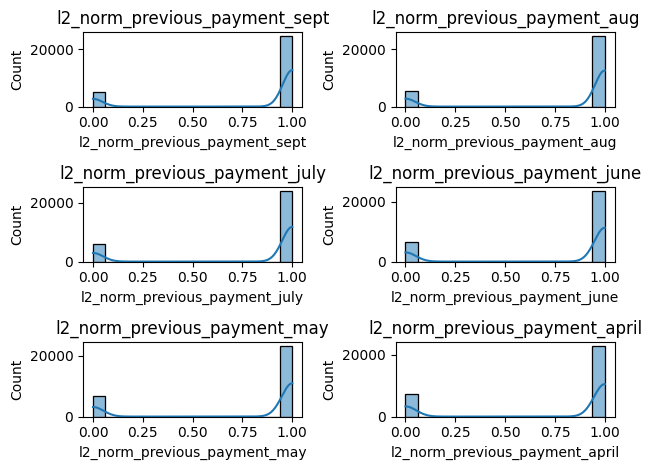

In [54]:

fig, ax = plt.subplots(3,2)
for axes,column in zip(ax.ravel(),l2_norm_transformed_previous_month_payment_df.columns):
    sns.histplot(
        data = l2_norm_transformed_previous_month_payment_df,x=column , kde=True, ax=axes
    )

    axes.set_title(f'{column}')

plt.tight_layout()

In [55]:
# YeoJohnson transformation

tf = vt.YeoJohnsonTransformer()
# Create a DataFrame to store the log-transformed values
yjohnson_transformed_previous_month_payment_df = pd.DataFrame(index=df.index)
for column in previous_payment_months:
    yjohnson_column_name = 'yjohnson_' + column
    tf.fit(df[[column]])
    normalized_data = tf.fit_transform(df[[column]])
    yjohnson_transformed_previous_month_payment_df[yjohnson_column_name] = normalized_data



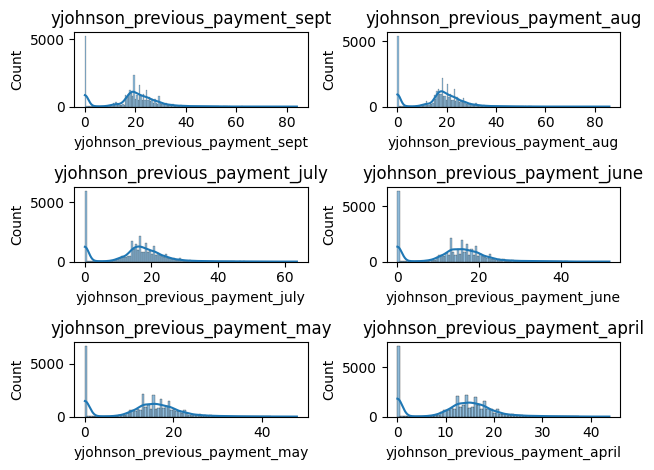

In [56]:

fig, ax = plt.subplots(3,2)
for axes,column in zip(ax.ravel(),yjohnson_transformed_previous_month_payment_df.columns):
    sns.histplot(
        data = yjohnson_transformed_previous_month_payment_df,x=column , kde=True, ax=axes
    )

    axes.set_title(f'{column}')

plt.tight_layout()

In [57]:
# standardization

standardization_transformed_columns = []

# Create a DataFrame to store the log-transformed values
standardized_previous_month_payment_df = pd.DataFrame()

for column in previous_payment_months:
    standardized_column_name = 'standardized' + column
    standardization_transformed_columns.append(standardized_column_name)

    # Calculate the log-transformed values and add them to the DataFrame
    standardized_previous_month_payment_df[standardized_column_name] = df_new[column].apply(lambda x: (x - np.mean(df_new[column]))/ np.std(df_new[column]))



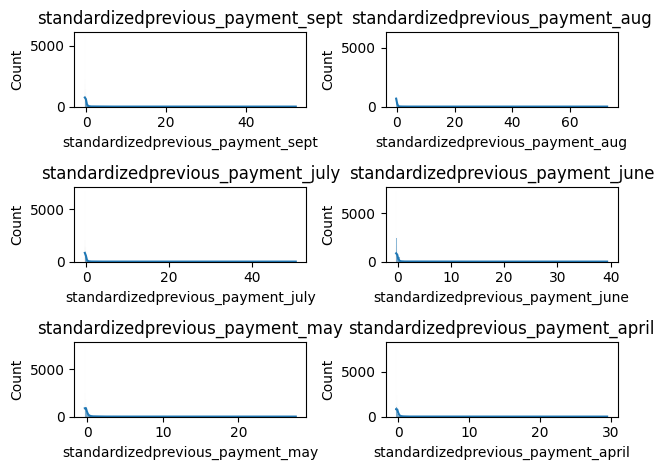

In [58]:

fig, ax = plt.subplots(3,2)
for axes,column in zip(ax.ravel(),standardization_transformed_columns):
    sns.histplot(
        data = standardized_previous_month_payment_df,x=column , kde=True, ax=axes
    )

    axes.set_title(f'{column}')

plt.tight_layout()

In [59]:
#min max scaling
min_max_transformed_columns = []
min_max_previous_month_payment_df = pd.DataFrame()

for column in previous_payment_months:
    min_max_column_name = 'min_max_' + column
    min_max_transformed_columns.append(min_max_column_name)

    # Calculate the min-max scaled values for the current column
    min_max_values = (df_new[column] - df_new[column].min()) / (df_new[column].max() - df_new[column].min())

    # Add the scaled values to the new DataFrame
    min_max_previous_month_payment_df[min_max_column_name] = min_max_values



In [60]:
# comparing skewness of all the transformations
# Skewness on  previous_payments_months columns
temp = 0
for column in previous_payment_months:
    temp = temp + df_new[column].skew()
skewness_normal_dataset = temp/len(previous_payment_months)
temp = 0

# skewness on log transformed dataset
for column in log_transformed_columns:
    temp = temp + log_transformed_previous_month_payment_df[column].skew()
skewness_log_transformed = temp / len(log_transformed_columns)

temp = 0
# skewness for l1 normalizer
for column in l1_norm_transformed_previous_month_payment_df.columns:
    temp = temp + l1_norm_transformed_previous_month_payment_df[column].skew()
skewness_l1_norm_transformed = temp/len(l1_norm_transformed_previous_month_payment_df.columns)

temp = 0
# skewness for l2 normalizer
for column in l2_norm_transformed_previous_month_payment_df.columns:
    temp = temp + l2_norm_transformed_previous_month_payment_df[column].skew()
skewness_l2_norm_transformed = temp/len(l2_norm_transformed_previous_month_payment_df.columns)

temp = 0
# skewness for yeojohnson normalizer
for column in yjohnson_transformed_previous_month_payment_df.columns:
    temp = temp + yjohnson_transformed_previous_month_payment_df[column].skew()
skewness_yjohnson_norm_transformed = temp/len(yjohnson_transformed_previous_month_payment_df.columns)


# skewness for standardized dataset
temp = 0

for column in standardization_transformed_columns:
    temp += standardized_previous_month_payment_df[column].skew()
skewness_standardized = temp/len(standardization_transformed_columns)

# skewness for min_max_scaling
temp = 0
for column in min_max_transformed_columns:
    temp += min_max_previous_month_payment_df[column].skew()
skewness_min_max = temp/ len(min_max_transformed_columns)

In [61]:
print("Skewness of normal dataset on 'previous payment' columns {}".format(skewness_normal_dataset))
print("Skewness of log transformed dataset on 'previous payment' columns {}".format(skewness_log_transformed))
print("Skewness of standardized dataset on 'previous payment' columns {}".format(skewness_standardized))
print("Skewness of min max scaled dataset on 'previous payment' columns {}".format(skewness_min_max))
print("Skewness of 'l1' normalizer scaled dataset on 'previous payment' columns {}".format(skewness_l1_norm_transformed))
print("Skewness of 'l2' normalizer scaled dataset on 'previous payment' columns {}".format(skewness_l2_norm_transformed))
print("Skewness of Yeo Johnson scaled dataset on 'previous payment' columns {}".format(skewness_yjohnson_norm_transformed))

Skewness of normal dataset on 'previous payment' columns 16.168657736483752
Skewness of log transformed dataset on 'previous payment' columns -1.0609334169218412
Skewness of standardized dataset on 'previous payment' columns 16.168657736483755
Skewness of min max scaled dataset on 'previous payment' columns 16.168657736483752
Skewness of 'l1' normalizer scaled dataset on 'previous payment' columns -1.4726089287889783
Skewness of 'l2' normalizer scaled dataset on 'previous payment' columns -1.4726089287889783
Skewness of Yeo Johnson scaled dataset on 'previous payment' columns -0.15293847096654303


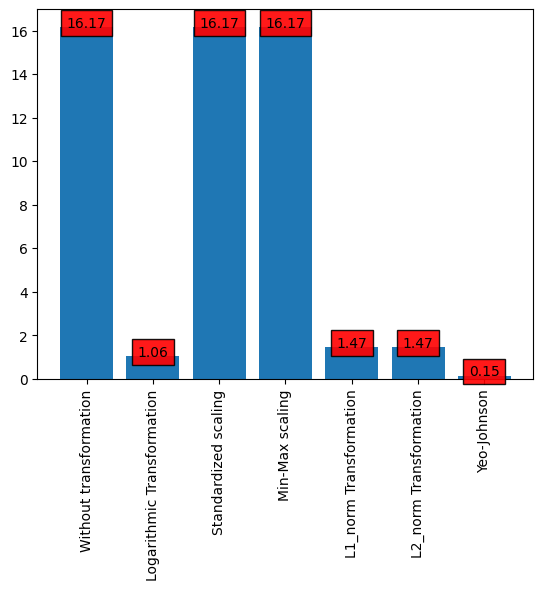

In [62]:
# graphical representations of skewness on different feature scaling techniques 
labels = ['Without transformation','Logarithmic Transformation','Standardized scaling','Min-Max scaling','L1_norm Transformation','L2_norm Transformation','Yeo-Johnson']
values = [round(abs(skewness_normal_dataset),2), round(abs(skewness_log_transformed),2),round(abs(skewness_standardized),2),round(abs(skewness_min_max),2), round(abs(skewness_l1_norm_transformed),2),round(abs(skewness_l2_norm_transformed),2), round(abs(skewness_yjohnson_norm_transformed),2)]
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], horizontalalignment = 'center', bbox=dict(facecolor='red', alpha=0.9))
plt.bar(labels , values)
plt.xticks(rotation = 90)
addlabels(labels,values,)
plt.show() 

**Conclusion**
* YouJohnson feature scaling method comes with very low skewness
* Logarithmic transformation also bring down skewness at 1.06 value
* **We should be making sure that there is no 0 value is the feature while we use Logarithmic scaling technique** 

## Implementing *Yeo-johnson* feature scaling technique

* YouJohnson transformation promised the best normal distribution plot than others with skewness 0.15.
* **Imp-In some case algorithm works fine without feature scaling, forcefully transforming into normal distribution can impact the accuracy of the model very much** 
* Let's train model on both the dataset scaled or non-scaled

### *Yeo-johnson* on unbalanced dataframe

In [63]:
yt = PowerTransformer()
norm_l1 = Normalizer(norm='l1')
scaled_unbalanced_df = pd.DataFrame(index =df_new.index)
# for all columns except 'will_default','Previous_payments',Dues'
for col in df_new.columns[:-3]:
    scaled_unbalanced_df[col] = df_new[col]
scaled_unbalanced_df['will_default'] = df_new[['will_default']]
scaled_unbalanced_df['Previous_payments'] = yt.fit_transform(df_new[['Previous_payments']])
scaled_unbalanced_df['Dues'] = yt.fit_transform(df_new[['Dues']])


### *Yeo-Johnson* on Balanced dataset

In [64]:
yt = PowerTransformer()
scaled_balanced_df = pd.DataFrame(index =df_new.index)
# for all columns except 'will_default','Previous_payments',Dues'
for col in df_new.columns[:-3]:
    scaled_balanced_df[col] = df_new[col]
scaled_balanced_df['will_default'] = df_new[['will_default']]
scaled_balanced_df['Previous_payments'] = yt.fit_transform(df_new[['Previous_payments']])
scaled_balanced_df['Dues'] = yt.fit_transform(df_new[['Dues']])

# Data Encoding

In [65]:
# Non scaled dataframes
df_new = pd.get_dummies(df_new, columns=['SEX','EDUCATION','MARRIAGE'],dtype=int)
df_smote = pd.get_dummies(df_smote, columns=['SEX','EDUCATION','MARRIAGE'], dtype=int)
# Scaled dataframes
scaled_unbalanced_df = pd.get_dummies(scaled_unbalanced_df, columns=['SEX','EDUCATION','MARRIAGE'], dtype=int)
scaled_balanced_df = pd.get_dummies(scaled_balanced_df, columns=['SEX','EDUCATION','MARRIAGE'], dtype=int)

# Model Training preprocessing data

In [66]:
print('Total columns non_scaled_unbalanced {}'.format(len(df_new.columns)))
print('Total columns non_scaled_balanced {}'.format(len(df_smote.columns)))
print('Total columns scaled_balanced_df {}'.format(len(scaled_balanced_df.columns)))
print('Total columns scaled_unbalanced_df {}'.format(len(scaled_unbalanced_df.columns)))

Total columns non_scaled_unbalanced 33
Total columns non_scaled_balanced 33
Total columns scaled_balanced_df 33
Total columns scaled_unbalanced_df 33


### Dropping columns (in all four dataframe)

In [67]:
df_new.drop(['ID','bill_sept','bill_aug','bill_july','bill_june','bill_may','bill_april','previous_payment_sept','previous_payment_aug','previous_payment_july','previous_payment_june','previous_payment_may','previous_payment_may','previous_payment_april'],axis=1, inplace=True)

df_smote.drop(['ID','bill_sept','bill_aug','bill_july','bill_june','bill_may','bill_april','previous_payment_sept','previous_payment_aug','previous_payment_july','previous_payment_june','previous_payment_may','previous_payment_may','previous_payment_april'],axis=1, inplace=True)

scaled_balanced_df.drop(['ID','bill_sept','bill_aug','bill_july','bill_june','bill_may','bill_april','previous_payment_sept','previous_payment_aug','previous_payment_july','previous_payment_june','previous_payment_may','previous_payment_may','previous_payment_april'],axis=1, inplace=True)

scaled_unbalanced_df.drop(['ID','bill_sept','bill_aug','bill_july','bill_june','bill_may','bill_april','previous_payment_sept','previous_payment_aug','previous_payment_july','previous_payment_june','previous_payment_may','previous_payment_may','previous_payment_april'],axis=1, inplace=True)

In [68]:
print('Total columns non_scaled_unbalanced {}'.format(len(df_new.columns)))
print('Total columns non_scaled_balanced {}'.format(len(df_smote.columns)))
print('Total columns scaled_balanced_df {}'.format(len(scaled_balanced_df.columns)))
print('Total columns scaled_unbalanced_df {}'.format(len(scaled_unbalanced_df.columns)))

Total columns non_scaled_unbalanced 20
Total columns non_scaled_balanced 20
Total columns scaled_balanced_df 20
Total columns scaled_unbalanced_df 20


# Model Development

In [69]:
# algorithms group
svc = SVC()
dtc = DecisionTreeClassifier()
rfclf = RandomForestClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()
ada_boost = AdaBoostClassifier()

classifiers  = {
    #obj : algo
    'SupportVectorMachine' : svc,
    'DecisionTreeClassifier' : dtc,
    'AdaboostClassifier': ada_boost,
    'RandomForestClassifier' : rfclf,
    'KNeighborsClassifier' : knn,
    'LogisticRegression' :lr,
    'XGBClassifier' : xgb
}

In [70]:
def best_model_selection(df,AUC=False, calibration_curve=False):
    algorithms = []
    mse_test =[]   
    accuracy_on_test=[]
    accuracy_on_train = []

    
    X_train,X_test, y_train,y_test = train_test_split(df.drop(['will_default'],axis=1), df[['will_default']])
    for obj, model in classifiers.items():
        algorithms.append(obj)
        model.fit(X_train,y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        accuracy_on_train.append(accuracy_score(y_train,train_pred))
        accuracy_on_test.append(accuracy_score(y_test, test_pred))

        mse_test.append(mean_squared_error(y_test,test_pred))
    score_data = {
        'Algorithm' : algorithms,
        'Accuracy(Train)' : accuracy_on_train,
        'Accurcy(Test)' : accuracy_on_test,
        'Test accuracy(MSE)' : mse_test,
    }
    score_df = pd.DataFrame(score_data)
 
        
    return score_df
        

In [71]:
score_df_smote = best_model_selection(df_smote)
score_df_smote

,Algorithm,Accuracy(Train),Accurcy(Test),Test accuracy(MSE)
0,SupportVectorMachine,0.619357,0.612310,0.387690
1,DecisionTreeClassifier,0.999372,0.741311,0.258689
2,AdaboostClassifier,0.754665,0.753467,0.246533
3,RandomForestClassifier,0.999372,0.812875,0.187125
4,KNeighborsClassifier,0.771015,0.652542,0.347458
5,LogisticRegression,0.560806,0.554015,0.445985
6,XGBClassifier,0.858158,0.804229,0.195771


**XGBClassifier and AdaboostClassifer are promising good accuracy on training as well as on test dataset**

In [72]:
score_unbalanced_df = best_model_selection(scaled_unbalanced_df)
score_unbalanced_df

,Algorithm,Accuracy(Train),Accurcy(Test),Test accuracy(MSE)
0,SupportVectorMachine,0.779244,0.777467,0.222533
1,DecisionTreeClassifier,0.999511,0.732267,0.267733
2,AdaboostClassifier,0.820178,0.816667,0.183333
3,RandomForestClassifier,0.999511,0.810800,0.189200
4,KNeighborsClassifier,0.837378,0.790000,0.210000
5,LogisticRegression,0.779244,0.777467,0.222533
6,XGBClassifier,0.868089,0.813333,0.186667


**AdaboostClassifer performing well on scaled unlabanced dataset**
**XGBClassifier also performs well**

In [73]:
score_balanced_df = best_model_selection(scaled_balanced_df)
score_balanced_df

,Algorithm,Accuracy(Train),Accurcy(Test),Test accuracy(MSE)
0,SupportVectorMachine,0.777111,0.783867,0.216133
1,DecisionTreeClassifier,0.999778,0.724267,0.275733
2,AdaboostClassifier,0.819467,0.823200,0.176800
3,RandomForestClassifier,0.999733,0.809333,0.190667
4,KNeighborsClassifier,0.838978,0.788267,0.211733
5,LogisticRegression,0.777111,0.783867,0.216133
6,XGBClassifier,0.867511,0.813867,0.186133


**Again Adaboost and XGBClassifier**
**RandomForest Classifier is ok ok**

In [74]:
score_df_simple = best_model_selection(df_new)
score_df_simple

,Algorithm,Accuracy(Train),Accurcy(Test),Test accuracy(MSE)
0,SupportVectorMachine,0.779022,0.778133,0.221867
1,DecisionTreeClassifier,0.999511,0.730533,0.269467
2,AdaboostClassifier,0.815689,0.823067,0.176933
3,RandomForestClassifier,0.999467,0.819467,0.180533
4,KNeighborsClassifier,0.812933,0.744533,0.255467
5,LogisticRegression,0.779022,0.778133,0.221867
6,XGBClassifier,0.864711,0.821200,0.178800


**Conclusion**
* AdaboostClassifier and XGBClassifier outperforms in terms of accuracy among all the remaining models
* Even scaling and balancing the dataset did not contribute much (as per what accuracy says)
* We will prefer **AdaboosClassifier** with **df_new** normal dataset

# Model Optimization

In [75]:
X_train,X_test,y_train,y_test = train_test_split(df_new.drop(['will_default'],axis=1),scaled_balanced_df[['will_default']],random_state=42)
adb = AdaBoostClassifier()
params = {
    'n_estimators' : [30,50,70,100],
    'algorithm' : ['SAMME','SAMME.R'],
    'learning_rate' :[0.5,0.7,1,1.4]
}
clf = GridSearchCV(estimator=adb,param_grid=params,cv=5,scoring='accuracy', verbose=3)
clf.fit(X_train,y_train)
best_parameters = clf.best_params_



Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=30;, score=0.822 total time=   0.4s
[CV 2/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=30;, score=0.824 total time=   0.4s
[CV 3/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=30;, score=0.822 total time=   0.4s
[CV 4/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=30;, score=0.819 total time=   0.4s
[CV 5/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=30;, score=0.814 total time=   0.4s
[CV 1/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=50;, score=0.821 total time=   0.7s
[CV 2/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=50;, score=0.826 total time=   0.7s
[CV 3/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=50;, score=0.821 total time=   0.7s
[CV 4/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=50;, score=0.820 total time=   0.7s
[CV 5/5] END algorithm=SAMME, learning_rate=0.5, n_estim

# Model Evaluation

In [76]:
adb = AdaBoostClassifier(**best_parameters)
adb.fit(X_train,y_train)
y_prediction = adb.predict(X_test)
print('Final accuracy of the model is {}%'.format(accuracy_score(y_test,y_prediction)*100))
print('Classification Report \n{}'.format(classification_report(y_test,y_prediction)))
print('Confusion Matrix \n{}'.format(confusion_matrix(y_test,y_prediction)))
      

Final accuracy of the model is 81.96%
Classification Report 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.67      0.34      0.45      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.67      7500
weighted avg       0.80      0.82      0.80      7500

Confusion Matrix 
[[5596  277]
 [1076  551]]


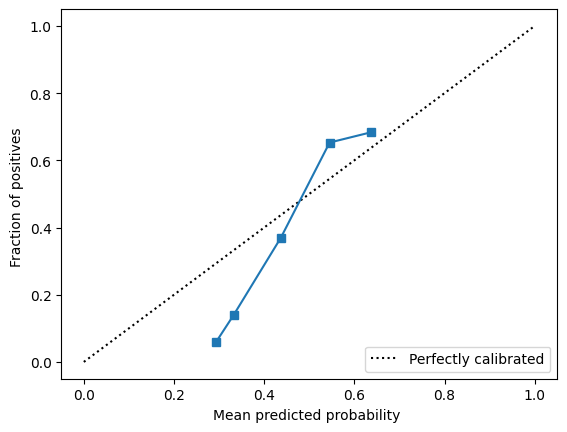

In [77]:
y_prob = adb.predict_proba(X_test)[:,1]
prob_true , prob_pred = calibration_curve(y_test,y_prob,n_bins=10)
display = CalibrationDisplay(prob_true,prob_pred,y_prob)
display.plot()

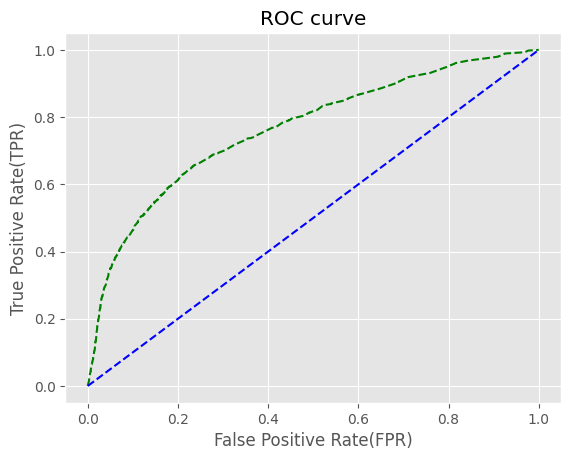

In [78]:
# roc curve
fpr, tpr , thresh = roc_curve(y_test,y_prob,pos_label=1)

#roc curve when tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr,_ = roc_curve(y_test,random_probs,pos_label=1)
plt.style.use('ggplot')

plt.plot(fpr,tpr,linestyle='--', color = 'green',label = 'AdaboostClassifer')
plt.plot(p_fpr,p_tpr, linestyle='--', color = 'blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.show()

**Conclusion**
* Curve line is above the tpr = fpr line,
* Hence, We can conclude that.
* **AdaboostClassifier line curve proves that model did good job in classifying the positive class**

# *Thankyou for your time 🙏*
* *Please show your support with Upvote 🤝*
* *For any suggestion please text me in discussion section*